# Load data

In [198]:
import gseapy as gp

In [199]:
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [200]:
import mygene
import networkx as nx
import scanpy as sc

# Read data

In [254]:
#adata = ad.read_h5ad("/storage/users/data/PANC/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust_time_pub.h5ad")
#'/storage/users/data/PANC/MA_time_adata_10066.h5ad'
#adata = ad.read_h5ad("/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust_time_pub.h5ad")
#adata = sc.read('/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust_palantir.h5ad')
adata = ad.read_h5ad("/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust.h5ad")#last adta according to github

In [255]:
## make trivial names unique
#adata.var_names = adata.var_names.astype(str)
#adata.var_names_make_unique()

In [256]:
adata

AnnData object with n_obs × n_vars = 6281 × 1992
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [257]:
adata.obs.head()

,condition,pct_cmo,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,doublet_scores,predicted_doublets,outlier,leiden
barcode,,,,,,,,,,,,,,,,,,,,
AAACCCAGTAGGCTCC-1,CTRL_1,24.628355,3076,8.031710,15109,9.623112,41.683765,55.569528,65.404726,76.126812,324,5.783825,2.144417,6545,8.786609,43.318552,0.040581,False,False,0
AAACCCAGTCGCAACC-1,CTRL_1,34.891727,4271,8.359837,18912,9.847605,38.055203,49.434222,57.741117,67.951565,354,5.872118,1.871827,7061,8.862484,37.336083,0.089431,False,False,0
AAACCCATCCACAAGT-1,CTRL_1,23.580470,3517,8.165648,14791,9.601842,34.548036,45.101751,55.628423,68.643094,212,5.361292,1.433304,4165,8.334712,28.159016,0.048303,False,False,0
AAACGCTTCACTACGA-1,CTRL_1,23.367459,4077,8.313362,18788,9.841027,37.710241,49.371940,58.888652,69.693421,479,6.173786,2.549500,6108,8.717518,32.510113,0.116329,False,False,0
AAAGAACAGATACAGT-1,CTRL_1,13.318522,4382,8.385489,21458,9.973899,39.076335,51.262932,60.322490,70.244198,522,6.259581,2.432659,8475,9.044994,39.495759,0.048303,False,False,0


### Create dictionary

In [258]:
import mygene

# Extract Ensembl Gene IDs from combined_adata
ensembl_ids = adata.var_names.tolist()

# Initialize MyGene.info client
mg = mygene.MyGeneInfo()

# Query MyGene.info for mappings
print("Querying MyGene.info...")
results = mg.querymany(
    ensembl_ids,
    scopes="ensembl.gene",
    fields="symbol",
    species="human"
)

# Initialize an empty dictionary to store the mapping
ensembl_to_gene_name = {}

# Populate the dictionary
print("Processing results...")
for res in results:
    ensembl_id = res.get("query")
    if "notfound" in res:
        # Skip if not found
        continue
    # Use the symbol field as the gene name
    ensembl_to_gene_name[ensembl_id] = res.get("symbol", ensembl_id)

# Display the resulting dictionary
print("\nEnsembl to Gene Name mapping:")
#print(ensembl_to_gene_name)


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Querying MyGene.info...


3 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000226519', 2), ('ENSG00000262352', 3)]
32 input query terms found no hit:	['ENSG00000286863', 'ENSG00000275557', 'ENSG00000231877', 'ENSG00000233005', 'ENSG00000237838', 'ENS


Processing results...

Ensembl to Gene Name mapping:


In [259]:
adata.var["ensembl_gene_id"] = adata.var_names.astype(str)

In [260]:
adata.var["gene_symbol"] = adata.var_names.map(ensembl_to_gene_name)

In [261]:
adata.var["gene_symbol"] = adata.var["gene_symbol"].fillna(adata.var["ensembl_gene_id"])

print("Remaining NaN in 'gene_symbol':", adata.var["gene_symbol"].isna().sum())


Remaining NaN in 'gene_symbol': 0


In [262]:
adata.var_names = adata.var['gene_symbol']

In [263]:
adata.var_names

Index(['HES4', 'ISG15', 'ENSG00000224969', 'C1QTNF12', 'CFAP74',
       'ENSG00000287586', 'PER3', 'ERRFI1-DT', 'GPR157', 'MFAP2',
       ...
       'LOC105373347', 'EOLA2-DT', 'MAMLD1', 'HMGB3', 'GABRA3', 'PNMA5', 'BGN',
       'ATP2B3', 'AMELY', 'MT-ATP6'],
      dtype='object', name='gene_symbol', length=1992)

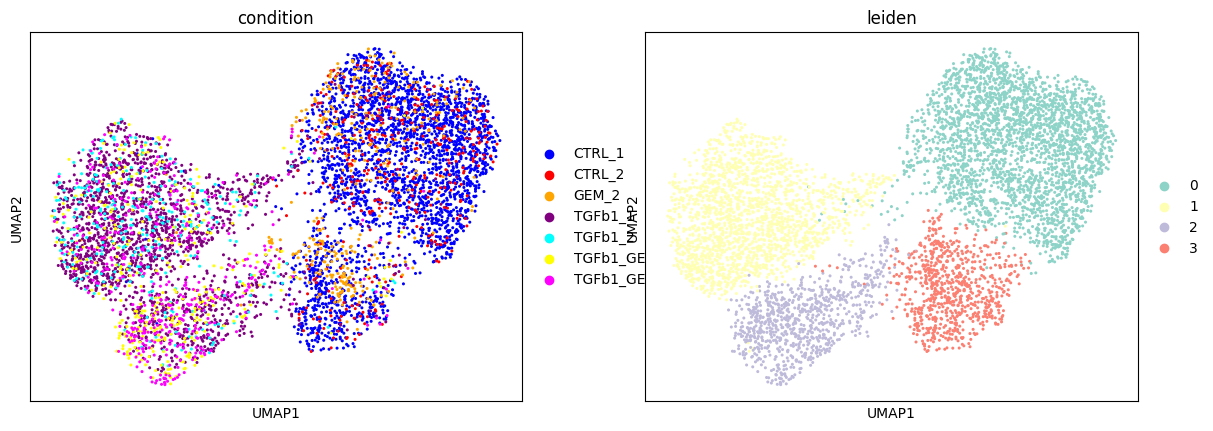

In [264]:
sc.pl.umap(adata, color=[ "condition","leiden"])

In [265]:
print(adata.obs.columns)  # Find the Leiden column name

Index(['condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores',
       'predicted_doublets', 'outlier', 'leiden'],
      dtype='object')


In [223]:
print(adata.obs['leiden'].unique())


['0', '3', '2', '1']
Categories (4, object): ['0', '1', '2', '3']


In [224]:
group1 = '1_Leiden_2'
group2 = '2_Leiden_3'

group1_cluster = ['2']
group2_cluster = ['3']


In [225]:
def label_clusters(cluster):
    if cluster in group1_cluster:
        return group1
    elif cluster in group2_cluster:
        return group2
    else:
        return "NA"


In [226]:
adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)


## Subset and run GSEA

In [227]:
bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
bdata = bdata[bdata.obs.sort_values('compare_clusters').index]
expression_df = bdata.to_df().T

res = gp.gsea(
    data=expression_df,
    gene_sets="MSigDB_Hallmark_2020",
    cls=bdata.obs.compare_clusters,
    permutation_num=1000,
    outdir=None,
    min_size=10,
    max_size=500,
    method='log2_ratio_of_classes',
    threads=4
)


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


In [228]:
res.res2d.sort_values(by='FDR q-val').head(10)



,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
4,gsea,Apoptosis,0.534898,1.533857,0.107843,0.252593,0.527,13/37,22.72%,IL1B;TNF;IL1A;BGN;TIMP3;NEDD9;MMP2;TNFSF10;SMA...
6,gsea,PI3K/AKT/mTOR Signaling,0.51353,1.45279,0.079741,0.282999,0.691,3/13,21.91%,NGF;CAMK4;CDKN1A
3,gsea,mTORC1 Signaling,0.458607,1.540986,0.067729,0.304923,0.513,14/31,48.05%,IGFBP5;TUBA4A;EGLN3;CDKN1A;SLC2A3;STC1;BCAT1;S...
5,gsea,UV Response Dn,0.487418,1.461417,0.101761,0.315741,0.67,15/38,31.89%,IGFBP5;COL1A1;INPP4B;COL1A2;PRKAR2B;F3;SMAD7;P...
2,gsea,Hypoxia,0.39857,1.554435,0.068966,0.37718,0.496,31/57,41.21%,BGN;PKP1;COL5A1;ACKR3;CHST2;LOX;NCAN;GPC4;SRPX...
8,gsea,Androgen Response,0.368005,1.321324,0.140461,0.445386,0.913,16/24,48.05%,MAF;INPP4B;IQGAP2;ADAMTS1;PMEPA1;NDRG1;ELL2;BM...
1,gsea,p53 Pathway,0.509215,1.586283,0.068898,0.479222,0.441,12/38,27.39%,KRT17;IL1A;PTPRE;VDR;SLC19A2;TGFA;FGF13;CDKN1A...
7,gsea,KRAS Signaling Up,0.623127,1.331912,0.116236,0.480223,0.905,14/55,15.35%,WNT7A;MAFB;IL1B;TMEM100;IKZF1;SPP1;NGF;CPE;G0S...
0,gsea,TGF-beta Signaling,0.558066,1.73407,0.0,0.556153,0.288,12/16,38.99%,THBS1;SMAD7;PMEPA1;NOG;LTBP2;SMURF2;TGFBR1;ID2...
10,gsea,Epithelial Mesenchymal Transition,0.573077,1.213133,0.249117,0.681809,0.985,47/89,28.20%,POSTN;MMP3;CDH6;BGN;SPP1;FAP;TIMP3;COL5A1;THBS...


In [229]:

res.res2d.columns


Index(['Name', 'Term', 'ES', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val',
       'Tag %', 'Gene %', 'Lead_genes'],
      dtype='object')

/tmp/ipykernel_572736/3144534122.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_res, y='Term', x='-log10(FDR)', palette='magma')


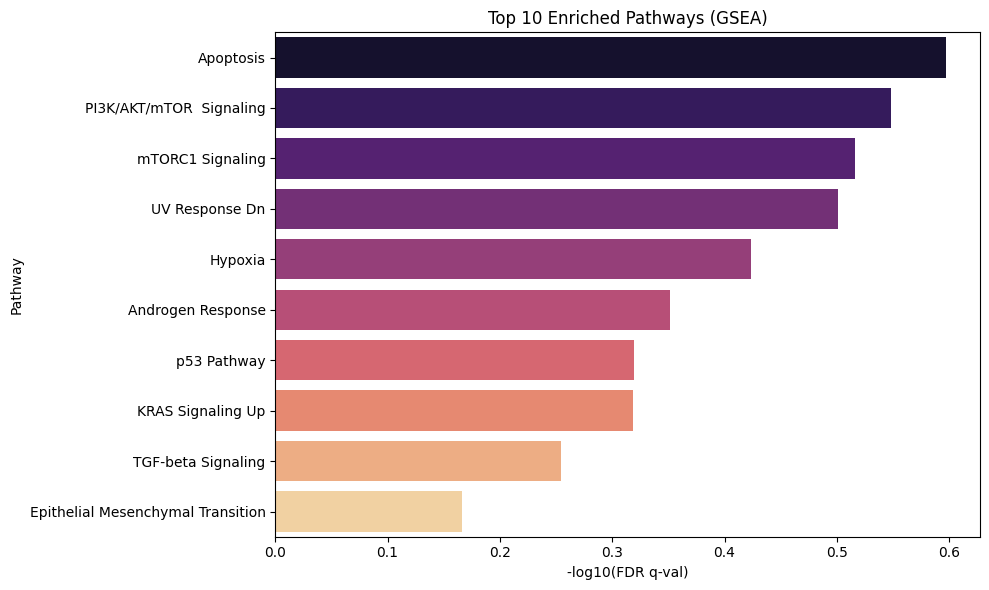

In [230]:
##### import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'FDR q-val' to numeric (force errors to NaN), drop NaNs
res.res2d['FDR q-val'] = pd.to_numeric(res.res2d['FDR q-val'], errors='coerce')
filtered_res = res.res2d.dropna(subset=['FDR q-val'])

# Sort and select top 10
top_res = filtered_res.sort_values(by='FDR q-val').head(10).copy()

# Compute -log10(FDR)
top_res['-log10(FDR)'] = -np.log10(top_res['FDR q-val'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_res, y='Term', x='-log10(FDR)', palette='magma')
plt.title('Top 10 Enriched Pathways (GSEA)')
plt.xlabel('-log10(FDR q-val)')
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()


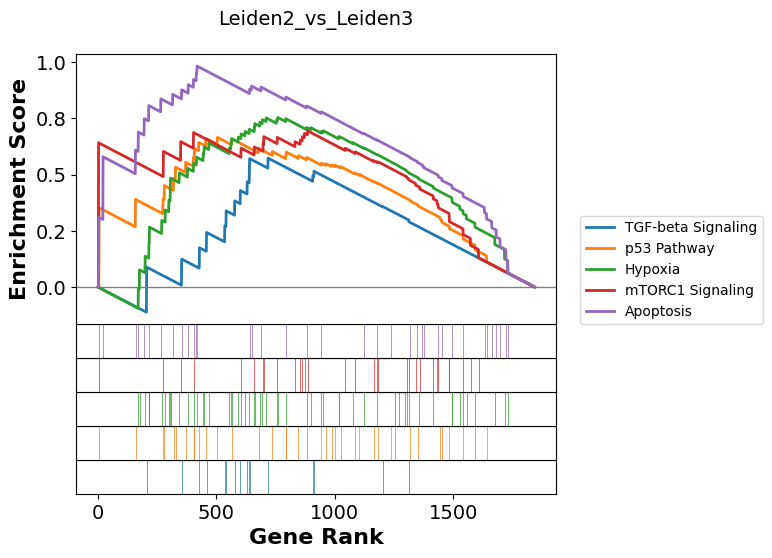

In [239]:
import matplotlib.pyplot as plt
from datetime import date

# Path where you want to save the figures
base_path_fig = "/home/maa81gb/single-cell-beta/figures/07_script_"
comparison = "Leiden2_vs_Leiden3"
current_date = date.today().strftime("%Y-%m-%d")

# Plot and save top 5 terms
terms = res.res2d.Term
fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
# Add title to the figure
fig.suptitle(comparison, fontsize=14)
# # Save entire figure
fig.savefig(f"{base_path_fig}gsea_{comparison}_{current_date}.png", bbox_inches='tight')


## GESA analysis for Leiden Clusters in a Loop and save the gsea csv file


Processing comparison: Leiden3_vs_Leiden0


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden3_vs_Leiden0.csv


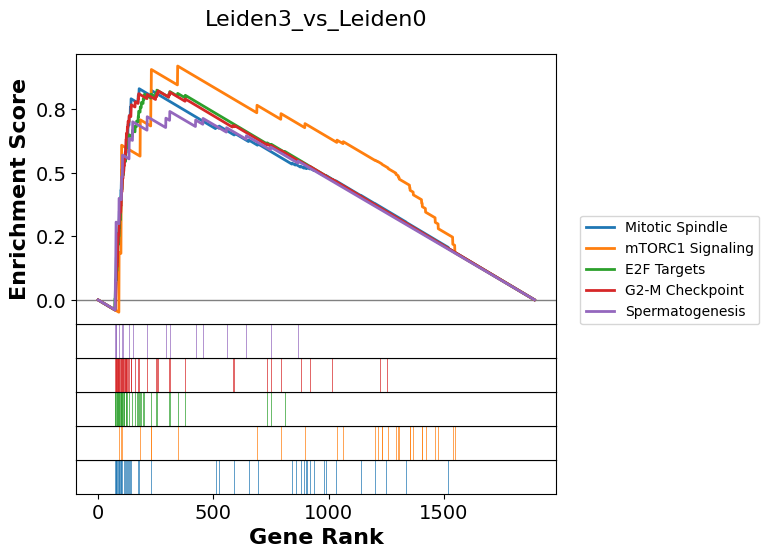

🖼️  Saved GSEA plot to: figures/gsea_Leiden3_vs_Leiden0.png

Processing comparison: Leiden2_vs_Leiden1


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden2_vs_Leiden1.csv


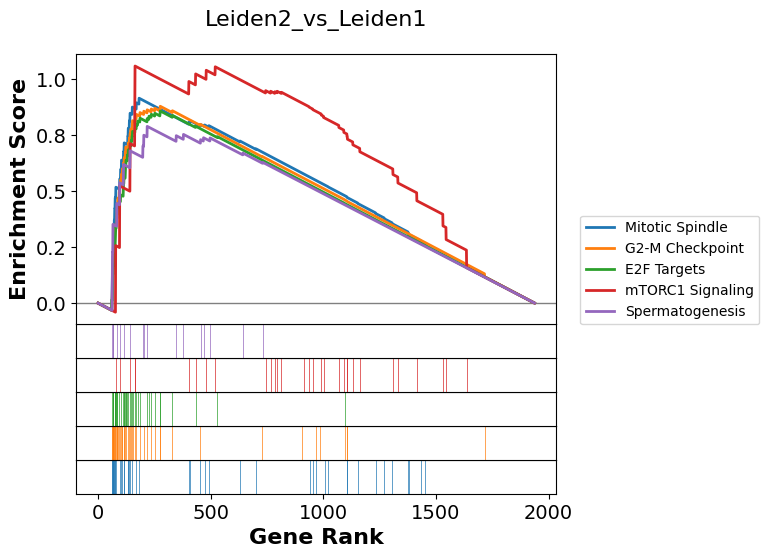

🖼️  Saved GSEA plot to: figures/gsea_Leiden2_vs_Leiden1.png

Processing comparison: Leiden1_vs_Leiden0


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden1_vs_Leiden0.csv


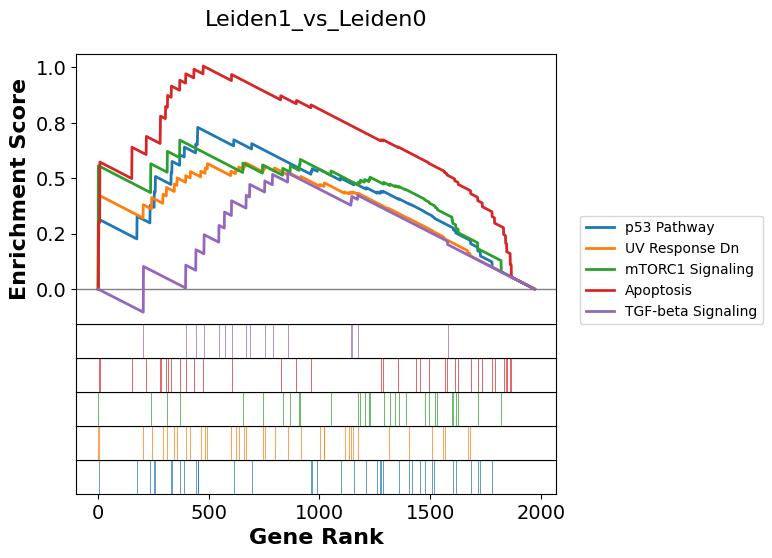

🖼️  Saved GSEA plot to: figures/gsea_Leiden1_vs_Leiden0.png

Processing comparison: Leiden2_vs_Leiden3


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden2_vs_Leiden3.csv


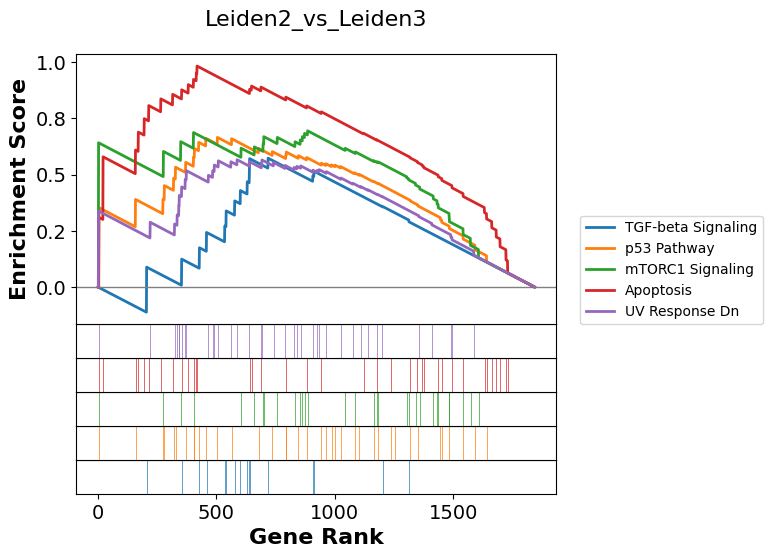

🖼️  Saved GSEA plot to: figures/gsea_Leiden2_vs_Leiden3.png


In [307]:
import os
import scanpy as sc
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Define your comparisons and clusters
comparisons = {
    "Leiden3_vs_Leiden0": (["3"], ["0"]),
    "Leiden2_vs_Leiden1": (["2"], ["1"]),
    "Leiden1_vs_Leiden0": (["1"], ["0"]),
    "Leiden2_vs_Leiden3": (["2"], ["3"]),
}

# Loop through each comparison
for comp_name, (group1_cluster, group2_cluster) in comparisons.items():
    print(f"\nProcessing comparison: {comp_name}")

    # Define group labels
    group1 = f"1_{comp_name.split('_vs_')[0]}"
    group2 = f"2_{comp_name.split('_vs_')[1]}"

    # Label function
    def label_clusters(cluster):
        if cluster in group1_cluster:
            return group1
        elif cluster in group2_cluster:
            return group2
        else:
            return "NA"

    # Apply labels to adata
    adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)

    # Subset to relevant cells
    bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
    if bdata.n_obs == 0:
        print(f"⚠️  Skipping {comp_name}: no matching cells found.")
        continue

    # Ensure consistent order
    sorted_indices = bdata.obs.sort_values(by='compare_clusters').index
    bdata = bdata[sorted_indices]

    # Extract expression matrix
    expression_df = bdata.to_df().T

    # Run GSEA
    try:
        res = gp.gsea(
            data=expression_df,
            gene_sets="MSigDB_Hallmark_2020",
            cls=bdata.obs.compare_clusters,
            permutation_num=1000,
            outdir=None,  # no auto-generated folder
            min_size=10,
            max_size=50,
            method='log2_ratio_of_classes',
            threads=8
        )

        # ✅ Save GSEA results to CSV
        csv_path = f"figures/gsea_{comp_name}.csv"
        res.res2d.to_csv(csv_path)
        print(f"📄 Saved GSEA results to: {csv_path}")

    except Exception as e:
        print(f"❌ Error in GSEA for {comp_name}: {e}")
        continue

    # Plot top 5 terms and save
    try:
        terms = res.res2d.Term
        fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
        fig.suptitle(comp_name, fontsize=16)
        fig_path = f"figures/gsea_{comp_name}.png"
        fig.savefig(fig_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"🖼️  Saved GSEA plot to: {fig_path}")
    except Exception as e:
        print(f"⚠️  Plotting failed for {comp_name}: {e}")


## GESA analysis for conditions in a Loop


🔎 Running GSEA for: TGFb1_2_vs_CTRL


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_TGFb1_2_vs_CTRL.csv


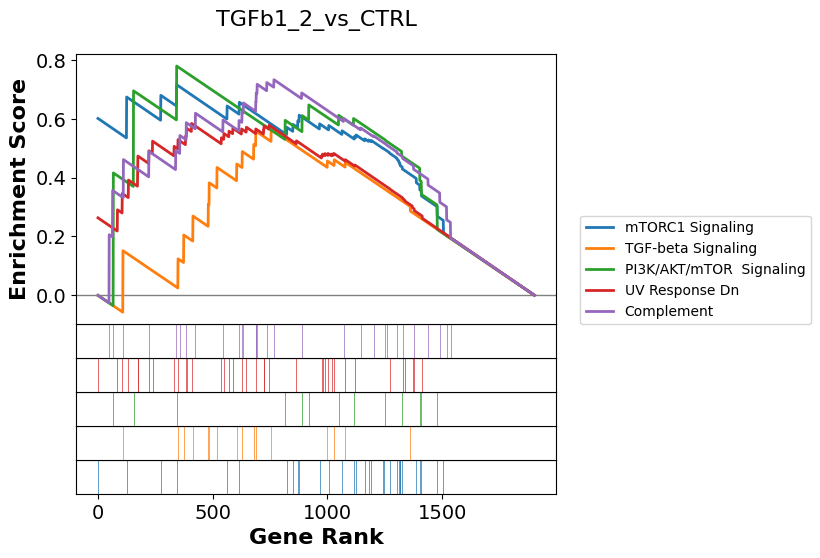

🖼️  Saved GSEA plot: figures/gsea_TGFb1_2_vs_CTRL.png

🔎 Running GSEA for: GEM_2_vs_CTRL


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_GEM_2_vs_CTRL.csv


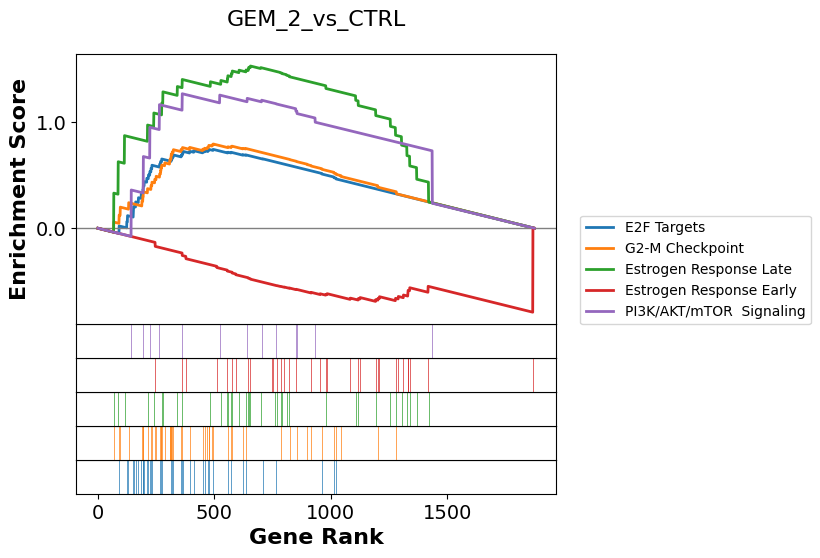

🖼️  Saved GSEA plot: figures/gsea_GEM_2_vs_CTRL.png

🔎 Running GSEA for: TGFb1_GEM_vs_TGFb1


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_TGFb1_GEM_vs_TGFb1.csv


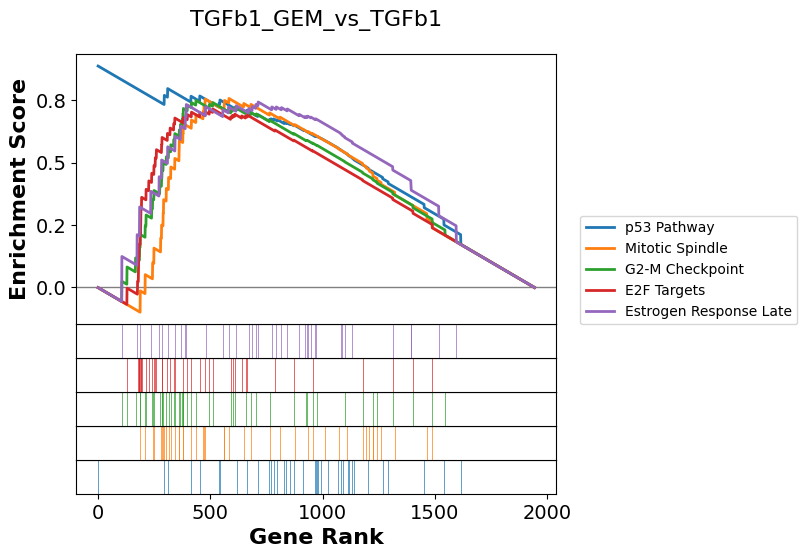

🖼️  Saved GSEA plot: figures/gsea_TGFb1_GEM_vs_TGFb1.png


In [306]:
import os
import scanpy as sc
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Ensure output folder exists
os.makedirs("figures", exist_ok=True)

# Define your condition-based comparisons
condition_comparisons = {
    "TGFb1_2_vs_CTRL": (["TGFb1_2"], ["CTRL_1", "CTRL_2"]),
    "GEM_2_vs_CTRL": (["GEM_2"], ["CTRL_1", "CTRL_2"]),
    "TGFb1_GEM_vs_TGFb1": (["TGFb1_GEM_1", "TGFb1_GEM_2"], ["TGFb1_1", "TGFb1_2"]),
}

# Loop through each condition comparison
for comp_name, (group1_cluster, group2_cluster) in condition_comparisons.items():
    print(f"\n🔎 Running GSEA for: {comp_name}")
    
    # Define group labels
    group1 = f"1_{comp_name.split('_vs_')[0]}"
    group2 = f"2_{comp_name.split('_vs_')[1]}"

    # Label function
    def label_clusters(cluster):
        if cluster in group1_cluster:
            return group1
        elif cluster in group2_cluster:
            return group2
        else:
            return "NA"

    # Assign group labels based on condition
    adata.obs['compare_clusters'] = adata.obs['condition'].map(label_clusters)

    # Subset relevant cells
    bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
    if bdata.n_obs == 0:
        print(f"⚠️ Skipping {comp_name}: no cells matched.")
        continue

    # Ensure consistent order
    bdata = bdata[bdata.obs.sort_values('compare_clusters').index]

    # Get expression matrix
    expression_df = bdata.to_df().T

    # Run GSEA
    try:
        res = gp.gsea(
            data=expression_df,
            gene_sets="MSigDB_Hallmark_2020",
            cls=bdata.obs.compare_clusters,
            permutation_num=1000,
            outdir=None,
            min_size=10,
            max_size=50,
            method='log2_ratio_of_classes',
            threads=8
        )

        # ✅ Save GSEA results to CSV
        csv_path = f"figures/gsea_{comp_name}.csv"
        res.res2d.to_csv(csv_path)
        print(f"📄 Saved GSEA results: {csv_path}")

    except Exception as e:
        print(f"❌ GSEA failed for {comp_name}: {e}")
        continue

    # Plot top 5 enriched terms and save
    try:
        terms = res.res2d.Term
        fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
        fig.suptitle(comp_name, fontsize=16)
        fig_path = f"figures/gsea_{comp_name}.png"
        fig.savefig(fig_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"🖼️  Saved GSEA plot: {fig_path}")
    except Exception as e:
        print(f"⚠️ Plotting failed for {comp_name}: {e}")


In [233]:
pwd!

'/home/maa81gb/single-cell-beta'

### Define new obs/category of cells (GEM subset of leiden)

In [300]:
# Number of cells in Leiden 3
count_leiden3 = (adata.obs['leiden'] == '3').sum()
print(f"Total cells in Leiden 3: {count_leiden3}")

# Number of cells in Leiden 3 AND condition == GEM_2
count_leiden3_gem2 = ((adata.obs['leiden'] == '3') & (adata.obs['condition'] == 'GEM_2')).sum()
print(f"Cells in Leiden 3 and GEM_2: {count_leiden3_gem2}")

# Number of cells in Leiden 0
count_leiden0 = (adata.obs['leiden'] == '0').sum()
print(f"Total cells in Leiden 0: {count_leiden0}")

# Number of cells in Leiden 0 AND condition == GEM_2
count_leiden0_gem2 = ((adata.obs['leiden'] == '0') & (adata.obs['condition'] == 'GEM_2')).sum()
print(f"Cells in Leiden 0 and GEM_2: {count_leiden0_gem2}")

# Number of cells in Leiden 2
count_leiden2 = (adata.obs['leiden'] == '2').sum()
print(f"Total cells in Leiden 2: {count_leiden2}")

# Number of cells in Leiden 2 AND condition in [TGFb1_GEM_1, TGFb1_GEM_2]
count_leiden2_tgfb1_gem = ((adata.obs['leiden'] == '2') & 
                           (adata.obs['condition'].isin(['TGFb1_GEM_1', 'TGFb1_GEM_2']))).sum()
print(f"Cells in Leiden 2 and TGFb1_GEM_1/GEM_2: {count_leiden2_tgfb1_gem}")

# Number of cells in Leiden 1 AND condition in [TGFb1_GEM_1, TGFb1_GEM_2]
count_leiden1 = (adata.obs['leiden'] == '1').sum()
count_leiden1_tgfb1_gem = ((adata.obs['leiden'] == '1') & 
                           (adata.obs['condition'].isin(['TGFb1_GEM_1', 'TGFb1_GEM_2']))).sum()
print(f"Total cells in Leiden 1: {count_leiden1}")
print(f"Cells in Leiden 1 and TGFb1_GEM_1/GEM_2: {count_leiden1_tgfb1_gem}")


Total cells in Leiden 3: 765
Cells in Leiden 3 and GEM_2: 136
Total cells in Leiden 0: 2789
Cells in Leiden 0 and GEM_2: 189
Total cells in Leiden 2: 848
Cells in Leiden 2 and TGFb1_GEM_1/GEM_2: 401
Total cells in Leiden 1: 1879
Cells in Leiden 1 and TGFb1_GEM_1/GEM_2: 326


In [301]:
def label_leiden_gem(row):
    # row['leiden'] and row['condition'] are strings
    if row['leiden'] == '3' and row['condition'] == 'GEM_2':
        return 'Leiden3_GEM2'
    elif row['leiden'] == '0' and row['condition'] == 'GEM_2':
        return 'Leiden0_GEM2'
    elif row['leiden'] == '2' and row['condition'] in ['TGFb1_GEM_1', 'TGFb1_GEM_2']:
        return 'Leiden2_TGFb1_GEM'
    elif row['leiden'] == '1' and row['condition'] in ['TGFb1_GEM_1', 'TGFb1_GEM_2']:
        return 'Leiden1_TGFb1_GEM'
    else:
        return 'other'

adata.obs['leiden_gem'] = adata.obs.apply(label_leiden_gem, axis=1)

# Check resulting categories:
print(adata.obs['leiden_gem'].value_counts())

other                5229
Leiden2_TGFb1_GEM     401
Leiden1_TGFb1_GEM     326
Leiden0_GEM2          189
Leiden3_GEM2          136
Name: leiden_gem, dtype: int64


In [302]:
def label_leiden_gem_extended(row):
    # For Leiden 3
    if row['leiden'] == '3':
        if row['condition'] == 'GEM_2':
            return 'Leiden3_GEM2'
        else:
            return 'Leiden3_nonGEM2'
    # For Leiden 0
    elif row['leiden'] == '0':
        if row['condition'] == 'GEM_2':
            return 'Leiden0_GEM2'
        else:
            return 'Leiden0_nonGEM2'
    # For Leiden 2
    elif row['leiden'] == '2':
        if row['condition'] in ['TGFb1_GEM_1', 'TGFb1_GEM_2']:
            return 'Leiden2_TGFb1_GEM'
        else:
            return 'Leiden2_nonTGFb1_GEM'
    # For Leiden 1
    elif row['leiden'] == '1':
        if row['condition'] in ['TGFb1_GEM_1', 'TGFb1_GEM_2']:
            return 'Leiden1_TGFb1_GEM'
        else:
            return 'Leiden1_nonTGFb1_GEM'
    # For any other cells not falling into these categories
    else:
        return 'other'

# Apply the function to create a new observation column
adata.obs['leiden_gem_extended'] = adata.obs.apply(label_leiden_gem_extended, axis=1)

# Check the new groups
print(adata.obs['leiden_gem_extended'].value_counts())


Leiden0_nonGEM2         2600
Leiden1_nonTGFb1_GEM    1553
Leiden3_nonGEM2          629
Leiden2_nonTGFb1_GEM     447
Leiden2_TGFb1_GEM        401
Leiden1_TGFb1_GEM        326
Leiden0_GEM2             189
Leiden3_GEM2             136
Name: leiden_gem_extended, dtype: int64


# Individually define comparison : Define the Comparison and perform the GSEA analysis

## GSEA by Combined Leiden+Condition comparisons

In [303]:
adata.obs['leiden_gem']

barcode
AAACCCAGTAGGCTCC-1                other
AAACCCAGTCGCAACC-1                other
AAACCCATCCACAAGT-1                other
AAACGCTTCACTACGA-1                other
AAAGAACAGATACAGT-1                other
                            ...        
TTTACTGTCATTACTC-1                other
TTTCACAGTGATATAG-1    Leiden2_TGFb1_GEM
TTTCACATCGATGCAT-1    Leiden2_TGFb1_GEM
TTTCATGTCCCTCTAG-1    Leiden1_TGFb1_GEM
TTTGACTGTTCCGGTG-1    Leiden2_TGFb1_GEM
Name: leiden_gem, Length: 6281, dtype: object


🔎 Running GSEA for: Leiden3_GEM2_vs_Leiden0_GEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden3_GEM2_vs_Leiden0_GEM2.csv


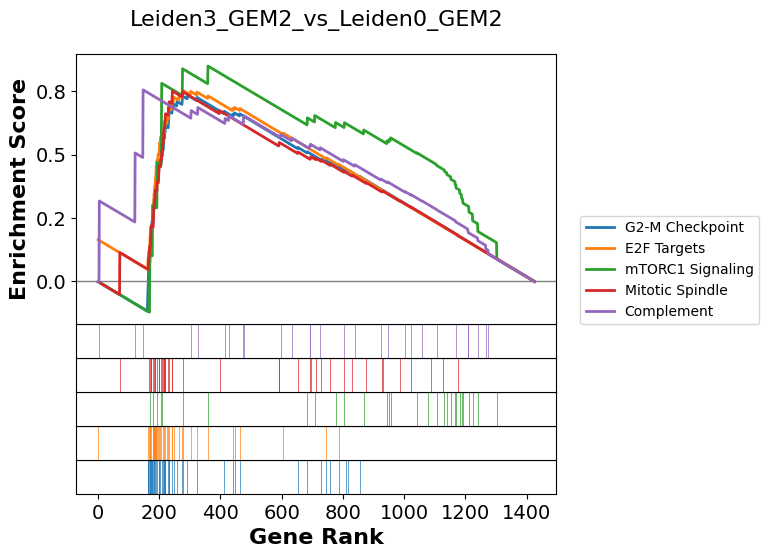

🖼️  Saved GSEA plot to: figures/gsea_Leiden3_GEM2_vs_Leiden0_GEM2.png

🔎 Running GSEA for: Leiden2_TGFb1_GEM_vs_Leiden1_TGFb1_GEM


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden1_TGFb1_GEM.csv


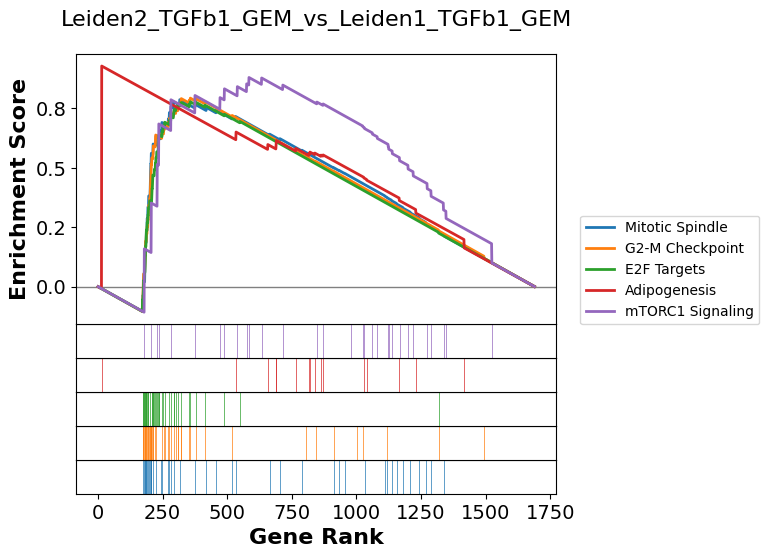

🖼️  Saved GSEA plot to: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden1_TGFb1_GEM.png

🔎 Running GSEA for: Leiden1_TGFb1_GEM_vs_Leiden0_GEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden1_TGFb1_GEM_vs_Leiden0_GEM2.csv


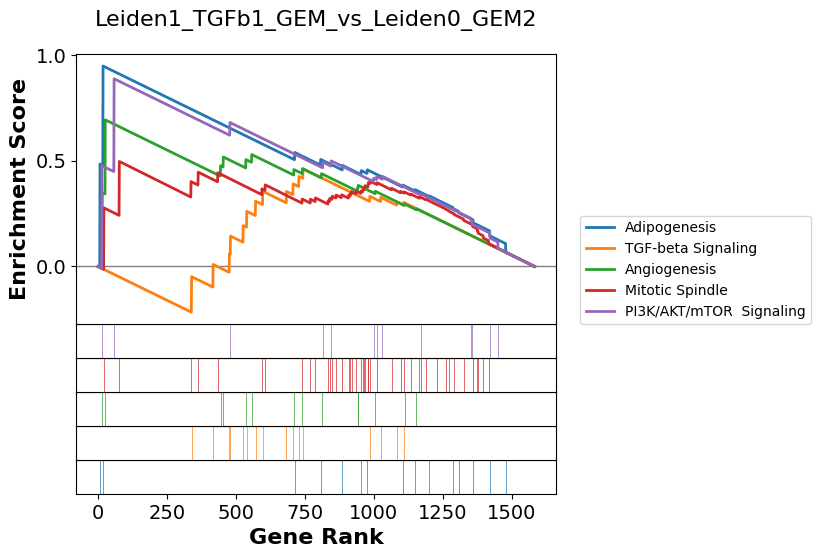

🖼️  Saved GSEA plot to: figures/gsea_Leiden1_TGFb1_GEM_vs_Leiden0_GEM2.png

🔎 Running GSEA for: Leiden2_TGFb1_GEM_vs_Leiden3_GEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden3_GEM2.csv


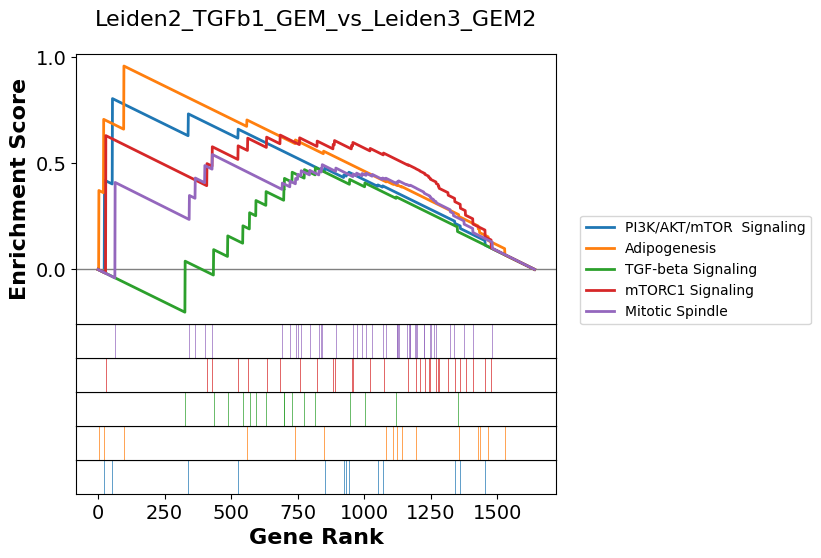

🖼️  Saved GSEA plot to: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden3_GEM2.png


In [305]:
import os
import scanpy as sc
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Make sure the output directory exists
os.makedirs("figures", exist_ok=True)

# Define leiden_gem-based comparisons
leiden_gem_comparisons = {
    "Leiden3_GEM2_vs_Leiden0_GEM2": (["Leiden3_GEM2"], ["Leiden0_GEM2"]),
    "Leiden2_TGFb1_GEM_vs_Leiden1_TGFb1_GEM": (["Leiden2_TGFb1_GEM"], ["Leiden1_TGFb1_GEM"]),
    "Leiden1_TGFb1_GEM_vs_Leiden0_GEM2": (["Leiden1_TGFb1_GEM"], ["Leiden0_GEM2"]),
    "Leiden2_TGFb1_GEM_vs_Leiden3_GEM2": (["Leiden2_TGFb1_GEM"], ["Leiden3_GEM2"]),
}

# Run GSEA for each comparison
for comp_name, (group1_cluster, group2_cluster) in leiden_gem_comparisons.items():
    print(f"\n🔎 Running GSEA for: {comp_name}")
    
    # Group labels
    group1 = f"1_{comp_name.split('_vs_')[0]}"
    group2 = f"2_{comp_name.split('_vs_')[1]}"

    # Label function
    def label_clusters(cluster):
        if cluster in group1_cluster:
            return group1
        elif cluster in group2_cluster:
            return group2
        else:
            return "NA"

    # Apply labels to the data
    adata.obs['compare_clusters'] = adata.obs['leiden_gem'].map(label_clusters)

    # Subset to relevant cells
    bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
    if bdata.n_obs == 0:
        print(f"⚠️ Skipping {comp_name}: no cells found.")
        continue

    # Ensure consistent order
    bdata = bdata[bdata.obs.sort_values('compare_clusters').index]

    # Get expression matrix
    expression_df = bdata.to_df().T

    # Run GSEA
    try:
        res = gp.gsea(
            data=expression_df,
            gene_sets="MSigDB_Hallmark_2020",
            cls=bdata.obs.compare_clusters,
            permutation_num=1000,
            outdir=None,
            min_size=10,
            max_size=50,
            method='log2_ratio_of_classes',
            threads=8
        )

        # ✅ Save results as CSV
        csv_path = f"figures/gsea_{comp_name}.csv"
        res.res2d.to_csv(csv_path)
        print(f"📄 Saved GSEA results to: {csv_path}")

    except Exception as e:
        print(f"❌ GSEA failed for {comp_name}: {e}")
        continue

    # Plot and save top 5 enriched terms
    try:
        terms = res.res2d.Term
        fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
        fig.suptitle(comp_name, fontsize=16)
        fig_path = f"figures/gsea_{comp_name}.png"
        fig.savefig(fig_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"🖼️  Saved GSEA plot to: {fig_path}")
    except Exception as e:
        print(f"⚠️ Plotting failed for {comp_name}: {e}")


### GEM inside the leiden clustering


🔎 Running GSEA for: Leiden3_GEM2_vs_Leiden3_nonGEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden3_GEM2_vs_Leiden3_nonGEM2.csv


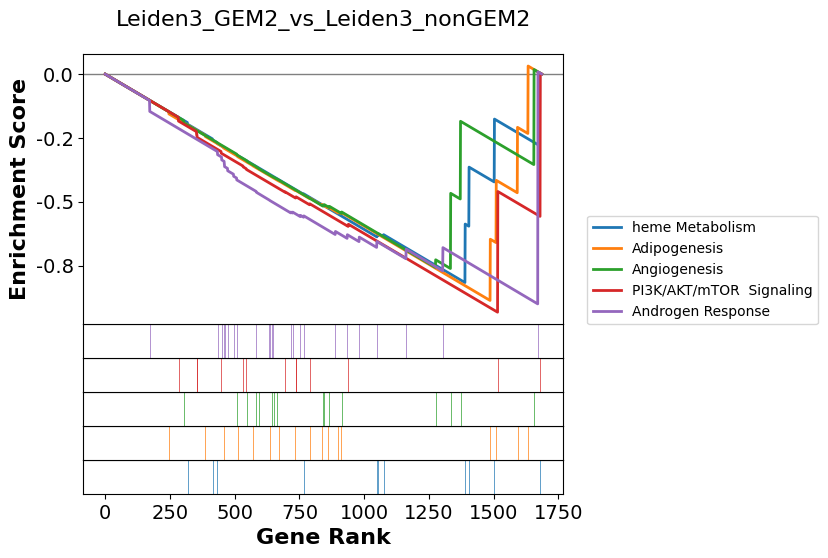

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden3_GEM2_vs_Leiden3_nonGEM2.png

🔎 Running GSEA for: Leiden0_GEM2_vs_Leiden0_nonGEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden0_GEM2_vs_Leiden0_nonGEM2.csv


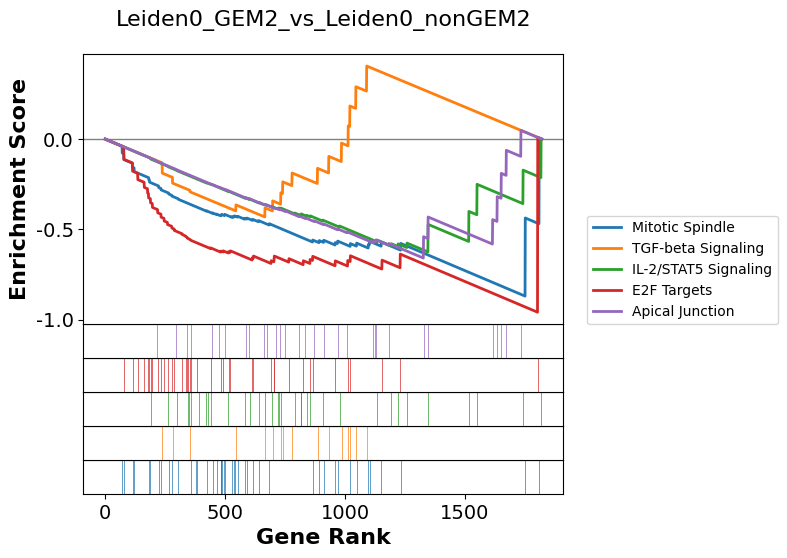

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden0_GEM2_vs_Leiden0_nonGEM2.png

🔎 Running GSEA for: Leiden2_TGFb1_GEM_vs_Leiden2_nonTGFb1_GEM


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden2_nonTGFb1_GEM.csv


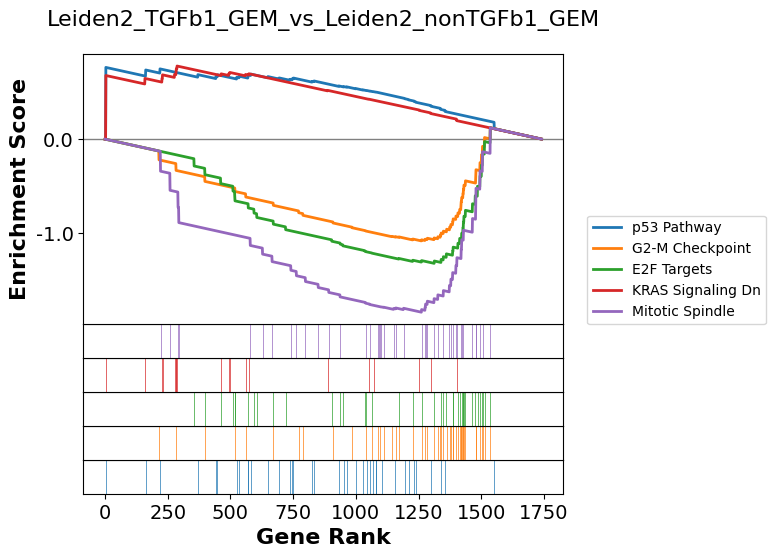

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden2_nonTGFb1_GEM.png

🔎 Running GSEA for: Leiden1_TGFb1_GEM_vs_Leiden1_nonTGFb1_GEM


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden1_TGFb1_GEM_vs_Leiden1_nonTGFb1_GEM.csv


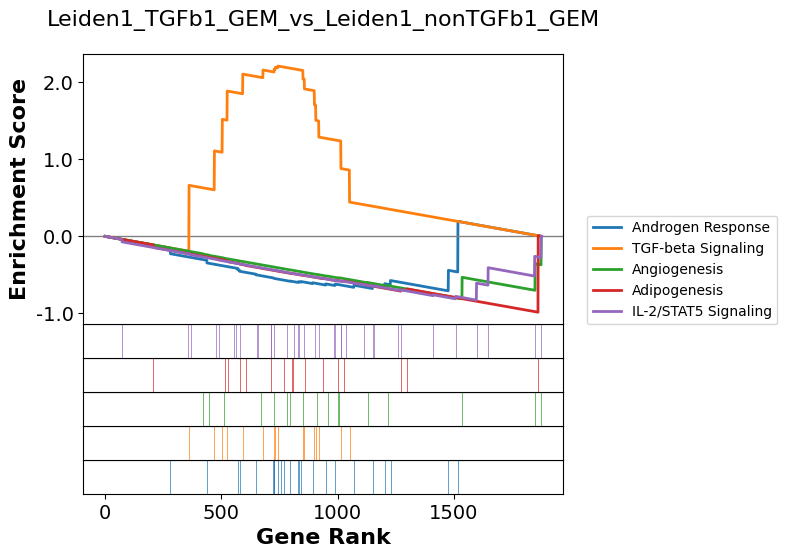

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden1_TGFb1_GEM_vs_Leiden1_nonTGFb1_GEM.png

🔎 Running GSEA for: Leiden3_GEM2_vs_Leiden0_nonGEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden3_GEM2_vs_Leiden0_nonGEM2.csv


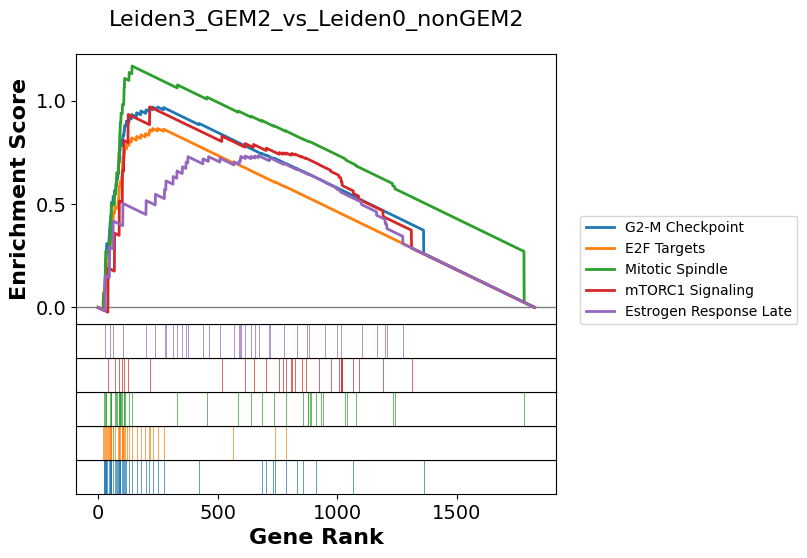

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden3_GEM2_vs_Leiden0_nonGEM2.png


In [308]:
import os
import scanpy as sc
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Ensure output directory exists
os.makedirs("figures", exist_ok=True)

# Define your leiden_gem_extended-based comparisons
leiden_gem_extended_comparisons = {
    "Leiden3_GEM2_vs_Leiden3_nonGEM2": (["Leiden3_GEM2"], ["Leiden3_nonGEM2"]),
    "Leiden0_GEM2_vs_Leiden0_nonGEM2": (["Leiden0_GEM2"], ["Leiden0_nonGEM2"]),
    "Leiden2_TGFb1_GEM_vs_Leiden2_nonTGFb1_GEM": (["Leiden2_TGFb1_GEM"], ["Leiden2_nonTGFb1_GEM"]),
    "Leiden1_TGFb1_GEM_vs_Leiden1_nonTGFb1_GEM": (["Leiden1_TGFb1_GEM"], ["Leiden1_nonTGFb1_GEM"]),
    "Leiden3_GEM2_vs_Leiden0_nonGEM2": (["Leiden3_GEM2"], ["Leiden0_nonGEM2"]),
}

# Run GSEA for each comparison
for comp_name, (group1_cluster, group2_cluster) in leiden_gem_extended_comparisons.items():
    print(f"\n🔎 Running GSEA for: {comp_name}")

    group1 = f"1_{comp_name.split('_vs_')[0]}"
    group2 = f"2_{comp_name.split('_vs_')[1]}"

    # Label function for leiden_gem_extended
    def label_clusters(cluster):
        if cluster in group1_cluster:
            return group1
        elif cluster in group2_cluster:
            return group2
        else:
            return "NA"

    # Apply group labels
    adata.obs['compare_clusters'] = adata.obs['leiden_gem_extended'].map(label_clusters)

    # Subset relevant cells
    bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
    if bdata.n_obs == 0:
        print(f"⚠️ Skipping {comp_name}: no matching cells.")
        continue

    # Order cells
    bdata = bdata[bdata.obs.sort_values('compare_clusters').index]

    # Get expression matrix
    expression_df = bdata.to_df().T

    # Run GSEA
    try:
        res = gp.gsea(
            data=expression_df,
            gene_sets="MSigDB_Hallmark_2020",
            cls=bdata.obs.compare_clusters,
            permutation_num=1000,
            outdir=None,
            min_size=10,
            max_size=50,
            method='log2_ratio_of_classes',
            threads=8
        )

        # Save results to CSV
        csv_path = f"figures/gsea_{comp_name}.csv"
        res.res2d.to_csv(csv_path)
        print(f"📄 Saved GSEA results: {csv_path}")

    except Exception as e:
        print(f"❌ GSEA failed for {comp_name}: {e}")
        continue

    # Plot and display top 5 terms
    try:
        terms = res.res2d.Term
        fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
        fig.suptitle(comp_name, fontsize=16)
        fig_path = f"figures/gsea_{comp_name}.png"
        fig.savefig(fig_path, dpi=300, bbox_inches='tight')
        plt.show()  # ✅ Display the figure
        print(f"🖼️  Saved and displayed GSEA plot: {fig_path}")
    except Exception as e:
        print(f"⚠️ Plotting failed for {comp_name}: {e}")


### Maryam, I have not used blow code

#### Define the comparisons

In [96]:
group1 = '1_Leiden3_GEM2'
group2 = '2_Leiden3_nonGEM2'

comparison = group1 + "_vs_" + group2

group1_cluster = ['Leiden3_GEM2']
#group1_cluster = ["Leiden2_TGFb1_GEM"]
#group1_cluster = ["6","17"]
group2_cluster = ['Leiden3_nonGEM2']
#group2_cluster = ["Leiden1_TGFb1_GEM"]
#group2_cluster = ["1","5","11","8"]

In [167]:
def label_clusters(cluster):
    if cluster in group1_cluster:
        return group1
    elif cluster in group2_cluster:
        return group2
    else:
        return "NA"  # This label will be used to filter out other clusters


# Create a new categorical column for comparison
adata.obs['compare_clusters'] = adata.obs['leiden_gem_extended'].map(label_clusters)


# Subset the data for only the two groups you're comparing
bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()

# sort indices to define the direction of comparison (could for interpretation of the results :)
sorted_indices = bdata.obs.sort_values(by='compare_clusters').index
bdata = bdata[sorted_indices]

In [168]:
#bdata.var_names = bdata.var['gene_symbol']

# create a dataframe from bdata and translae ensembl ID to symbol (if not done before!!)
expression_df = bdata.to_df().T

In [169]:
expression_df

barcode
gene_symbol
HES4
ISG15
ENSG00000224969
C1QTNF12
CFAP74
...
PNMA5
BGN
ATP2B3


### Perform GSEA and visualize

In [125]:
#expression_df.head()

In [126]:
#help(gp.gsea)

In [127]:
## Get the names for the pathway libraries and select one in the gsea function
names = gp.get_library_name()
#print(names)

In [128]:
bdata.obs.compare_clusters

Series([], Name: compare_clusters, dtype: object)

In [129]:
# Example of how to create a binary class list for GSEA
# Let's say you want to compare 'group1' vs 'group2' in 'compare_clusters'
binary_cls = ['group1' if cluster == 'non-resistant' else 'group2' for cluster in bdata.obs.compare_clusters]
binary_cls[0:10]

[]

In [130]:
bdata.obs['compare_clusters']

Series([], Name: compare_clusters, dtype: object)

In [131]:
# Now you can run GSEA on this filtered data, using the cluster2 label:
# When you are running GSEA, make sure to use the new cluster2 la
res = gp.gsea(data=expression_df,
              #gene_sets="GO_Biological_Process_2023",
              #gene_sets="Reactome_2022",
              gene_sets="MSigDB_Hallmark_2020",
              cls=bdata.obs.compare_clusters, 
              #cls=binary_cls,
              permutation_num=1000,
              outdir=None,
              min_size= 10, 
              max_size = 50,
              method='log2_ratio_of_classes', 
              threads=26)

Exception: Input groups have to be 2!

In [133]:
print(adata.obs["leiden_gem_extended"].unique())


['Leiden0_nonGEM2' 'Leiden3_nonGEM2' 'Leiden2_nonTGFb1_GEM'
 'Leiden1_nonTGFb1_GEM' 'Leiden3_GEM2' 'Leiden0_GEM2' 'Leiden2_TGFb1_GEM'
 'Leiden1_TGFb1_GEM']


In [408]:
res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,heme Metabolism,-0.770052,-1.186723,0.357143,1.0,0.779,4/15,18.21%,TNS1;EPB42;GATA1;ALDH1L1
1,gsea,Angiogenesis,-0.71478,-1.102921,0.426106,1.0,0.998,3/16,21.66%,VCAN;PF4;SPP1
2,gsea,Adipogenesis,-0.809236,-1.097708,0.290646,1.0,0.999,4/13,15.91%,COL4A1;COL15A1;RETN;FABP4
3,gsea,Apical Junction,-0.677127,-1.042003,0.502045,1.0,1.0,7/31,14.10%,VCAN;TNFRSF11B;CLDN11;CDH11;CDH6;PECAM1;NECTIN4
4,gsea,Glycolysis,-0.643732,-1.026318,0.538198,1.0,1.0,3/31,19.78%,VCAN;HS6ST2;CHST2
5,gsea,Coagulation,-0.651033,-0.996609,0.660861,1.0,1.0,4/28,19.42%,TIMP3;CPN1;PECAM1;PF4
6,gsea,UV Response Up,0.32838,0.993142,0.383281,1.0,0.95,11/16,34.85%,TUBA4A;ATF3;ICAM1;GAL;RHOB;IRF1;SLC6A8;GLS;HMO...
7,gsea,Myogenesis,-0.695873,-0.981095,0.662663,1.0,1.0,4/41,5.02%,SGCA;SGCD;NOS1;COL15A1
8,gsea,UV Response Dn,-0.574493,-0.974109,0.661255,1.0,1.0,2/40,19.06%,KALRN;COL1A2
9,gsea,Androgen Response,-0.746284,-0.970382,0.785174,1.0,1.0,1/21,1.88%,BMPR1B


In [409]:
# print head results
print(res.res2d.head(25))


    Name                       Term        ES       NES NOM p-val FDR q-val  \
0   gsea            heme Metabolism -0.770052 -1.186723  0.357143       1.0   
1   gsea               Angiogenesis  -0.71478 -1.102921  0.426106       1.0   
2   gsea               Adipogenesis -0.809236 -1.097708  0.290646       1.0   
3   gsea            Apical Junction -0.677127 -1.042003  0.502045       1.0   
4   gsea                 Glycolysis -0.643732 -1.026318  0.538198       1.0   
5   gsea                Coagulation -0.651033 -0.996609  0.660861       1.0   
6   gsea             UV Response Up   0.32838  0.993142  0.383281       1.0   
7   gsea                 Myogenesis -0.695873 -0.981095  0.662663       1.0   
8   gsea             UV Response Dn -0.574493 -0.974109  0.661255       1.0   
9   gsea          Androgen Response -0.746284 -0.970382  0.785174       1.0   
10  gsea                 Complement -0.599112 -0.954538  0.639327       1.0   
11  gsea      Xenobiotic Metabolism -0.589445 -0.947

In [410]:
!pwd

/storage/users/job37yv/Projects/single-cell_samantha/code/scripts_praktikum


In [411]:
comparison

'1_Leiden3_GEM2_vs_2_Leiden3_nonGEM2'

In [412]:
from datetime import datetime

# Define the base path and comparison
base_path = "/storage/users/job37yv/Projects/single-cell_samantha/code/scripts_praktikum/data/"
base_path_fig = "/storage/users/job37yv/Projects/single-cell_samantha/code/scripts_praktikum/figures/"

# Get the current date in YYYY-MM-DD format
current_date = datetime.now().strftime("%Y-%m-%d")

# Construct the file path with the date
path = f"{base_path}res_gsea_reactome2_leiden3vs0_{comparison}_{current_date}.csv"

# write to file location
res.res2d.to_csv(path, index=False)

print(f"Generated file path: {path}")


Generated file path: /storage/users/job37yv/Projects/single-cell_samantha/code/scripts_praktikum/data/res_gsea_reactome2_leiden3vs0_1_Leiden3_GEM2_vs_2_Leiden3_nonGEM2_2025-03-03.csv


0               heme Metabolism
1                  Angiogenesis
2                  Adipogenesis
3               Apical Junction
4                    Glycolysis
5                   Coagulation
6                UV Response Up
7                    Myogenesis
8                UV Response Dn
9             Androgen Response
10                   Complement
11        Xenobiotic Metabolism
12            KRAS Signaling Up
13            KRAS Signaling Dn
14        Inflammatory Response
15              Spermatogenesis
16           TGF-beta Signaling
17          Allograft Rejection
18      Cholesterol Homeostasis
19    Interferon Gamma Response
20      Estrogen Response Early
21    Interferon Alpha Response
22                  E2F Targets
23                    Apoptosis
24             mTORC1 Signaling
25         IL-2/STAT5 Signaling
26                  p53 Pathway
27              G2-M Checkpoint
28              Mitotic Spindle
29       Estrogen Response Late
Name: Term, dtype: object
Generated file

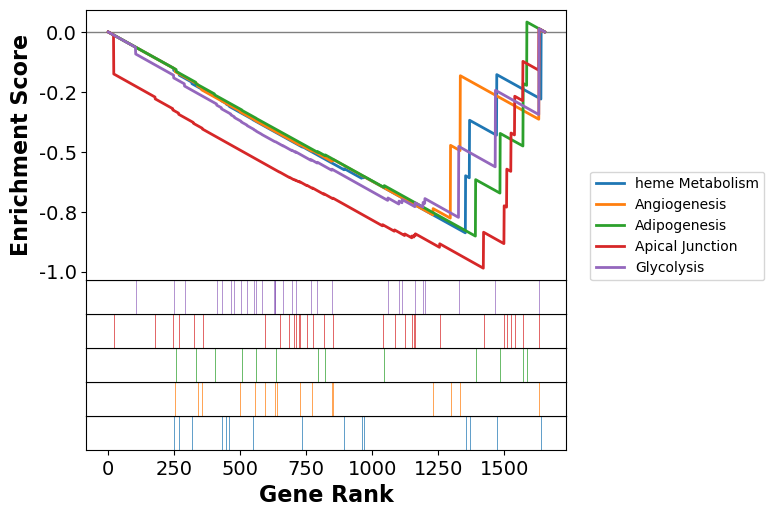

In [413]:

# Visualize the top pathways
terms = res.res2d.Term
print(terms)
axs = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )

# Assuming axs is a matplotlib Axes object, you save the figure like this:
plt.savefig(base_path_fig + f"res_gsea_{comparison}_{current_date}.png", bbox_inches='tight')

print(f"Generated file path: {path}")

### Get the genes in the pathway

In [330]:
data = res.res2d
type(data)
data

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,p53 Pathway,0.742685,2.126705,0.040307,0.036393,0.028,1/37,0.10%,ZBTB16
1,gsea,Mitotic Spindle,0.616768,2.073966,0.0,0.018846,0.029,27/47,29.09%,CDK1;NUSAP1;KIF11;KIF2C;TOP2A;FGD4;TPX2;RAPGEF...
2,gsea,G2-M Checkpoint,0.663719,1.916106,0.0,0.017763,0.04,27/47,20.97%,CDC6;MYBL2;POLQ;CDK1;STIL;NUSAP1;MKI67;KIF11;K...
3,gsea,E2F Targets,0.663277,1.782859,0.001515,0.031519,0.085,29/43,24.92%,MYBL2;SPC25;RRM2;MELK;CDK1;TK1;DIAPH3;MCM4;ATA...
4,gsea,Estrogen Response Late,0.515651,1.744991,0.015766,0.032754,0.107,10/34,20.86%,CDC6;CYP4F11;STIL;SERPINA1;TOP2A;SFN;ID2;LARGE...
5,gsea,mTORC1 Signaling,0.441706,1.554199,0.020144,0.125426,0.381,10/26,33.56%,RRM2;MCM4;DHFR;TUBA4A;HK2;CDKN1A;STC1;NIBAN1;G...
6,gsea,Spermatogenesis,0.604756,1.529188,0.041494,0.121249,0.418,10/17,27.85%,CDK1;KIF2C;EZH2;CAMK4;NOS1;TTK;CDKN3;NEK2;TLE4...
7,gsea,KRAS Signaling Dn,0.651123,1.507628,0.076471,0.117628,0.455,5/19,15.26%,ZBTB16;TFF2;GRID2;TENM2;NOS1
8,gsea,Androgen Response,-0.384935,-1.277904,0.122754,1.0,0.674,11/21,46.87%,BMPR1B;MAF;RRP12;MAP7;PMEPA1;HMGCS1;UAP1;CDK6;...
9,gsea,Angiogenesis,-0.760772,-1.204222,0.440758,0.877275,0.863,3/17,13.10%,SLCO2A1;SPP1;POSTN


In [331]:
# Extracting lead_genes
lead_genes = data['Lead_genes'].head(15)

# Printing the lead_genes
for i, genes in enumerate(lead_genes, 1):
    print(f"Row {i} Lead Genes: {genes}")

Row 1 Lead Genes: ZBTB16
Row 2 Lead Genes: CDK1;NUSAP1;KIF11;KIF2C;TOP2A;FGD4;TPX2;RAPGEF5;ANLN;KIF20B;TTK;PRC1;KIF23;EPB41;LMNB1;SMC4;CENPF;KIF4A;TUBA4A;BIRC5;NEK2;DLGAP5;ECT2;NEDD9;DOCK2;ARHGEF2;PALLD
Row 3 Lead Genes: CDC6;MYBL2;POLQ;CDK1;STIL;NUSAP1;MKI67;KIF11;KIF2C;KNL1;TOP2A;TPX2;EZH2;KIF20B;TTK;PRC1;KIF23;LMNB1;SMC4;PRIM2;UBE2C;CENPF;KIF4A;CENPA;CDKN3;BIRC5;NEK2
Row 4 Lead Genes: MYBL2;SPC25;RRM2;MELK;CDK1;TK1;DIAPH3;MCM4;ATAD2;MKI67;KIF18B;HELLS;KIF2C;MMS22L;UBE2T;TOP2A;EZH2;HMGB2;CIT;LMNB1;BUB1B;SMC4;PRIM2;KIF4A;CDKN3;BIRC5;DLGAP5;CDKN1A;PTTG1
Row 5 Lead Genes: CDC6;CYP4F11;STIL;SERPINA1;TOP2A;SFN;ID2;LARGE1;IGFBP4;LAMC2
Row 6 Lead Genes: RRM2;MCM4;DHFR;TUBA4A;HK2;CDKN1A;STC1;NIBAN1;GBE1;BUB1
Row 7 Lead Genes: CDK1;KIF2C;EZH2;CAMK4;NOS1;TTK;CDKN3;NEK2;TLE4;PCSK1N
Row 8 Lead Genes: ZBTB16;TFF2;GRID2;TENM2;NOS1
Row 9 Lead Genes: BMPR1B;MAF;RRP12;MAP7;PMEPA1;HMGCS1;UAP1;CDK6;SAT1;AKAP12;KRT8
Row 10 Lead Genes: SLCO2A1;SPP1;POSTN
Row 11 Lead Genes: ENPEP;TYR
Row 12 Lead Genes: FC

In [51]:
from datetime import datetime

# Assuming `data` is your DataFrame and `comparison` is defined
# Extract the top 15 lead genes
lead_genes = data['Lead_genes'].head(15)

# Define the base path for saving the gene list
base_path = "/storage/users/job37yv/Projects/single-cell_samantha/data/res_gsea_hallmark/"

# Get the current date in YYYY-MM-DD format
current_date = datetime.now().strftime("%Y-%m-%d")

# Construct the file path for saving the lead genes
gene_list_path = f"{base_path}lead_genes_leiden2vs1_reactome_big_{comparison}_{current_date}.csv"

# Write the lead genes to a file
with open(gene_list_path, "w") as file:
    file.write("Top 15 Lead Genes:\n")
    for i, genes in enumerate(lead_genes, 1):
        file.write(f"Row {i}: {genes}\n")

print(f"Lead genes saved to: {gene_list_path}")


Lead genes saved to: /storage/users/job37yv/Projects/single-cell_samantha/data/res_gsea_hallmark/lead_genes_leiden2vs1_reactome_big_1resistant_vs_2non-reistant_2025-02-26.csv


## Print Heatmap

### Barcode annotation or leiden

In [52]:
from gseapy import heatmap

# Plotting heatmap for a specific pathway
i = 1  # Index of the pathway to visualize

# Translate Barcode to Leiden Clusters
barcode_to_leiden = adata.obs['leiden'].to_dict()  # Map barcodes to Leiden clusters

# Extract barcodes from GSEA results
barcodes = res.res2d.columns.tolist()

# Print terms (optional)
terms = res.res2d.Term.tolist()

# Extract lead genes for the selected pathway
genes = res.res2d.Lead_genes[i].split(";")  # Ensure ";" is the correct separator

# Prepare the heatmap DataFrame
df_heat = res.heatmat.loc[genes]  # Extract expression data for the lead genes

# Map barcodes to Leiden clusters
new_columns = df_heat.columns.map(barcode_to_leiden.get)

# Assign the new column names back to the DataFrame
df_heat.columns = new_columns



In [53]:

# Calculate the average expression per Leiden group
average_expression_per_leiden = df_heat.groupby(df_heat.columns, axis=1).mean()

# Print the average expression for debugging
print("\nAverage expression per Leiden group:")
print(average_expression_per_leiden)





Average expression per Leiden group:
barcode           0         3
gene_name                    
BUB1       0.024549  0.658221
RRM2       0.064795  1.169487
AURKA      0.039139  0.705068
MCM4       0.050383  0.352019
DHFR       0.136769  0.618110
TUBA4A     0.016202  0.064295
CDKN1A     0.077637  0.223353


/tmp/ipykernel_752373/1467009363.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  average_expression_per_leiden = df_heat.groupby(df_heat.columns, axis=1).mean()


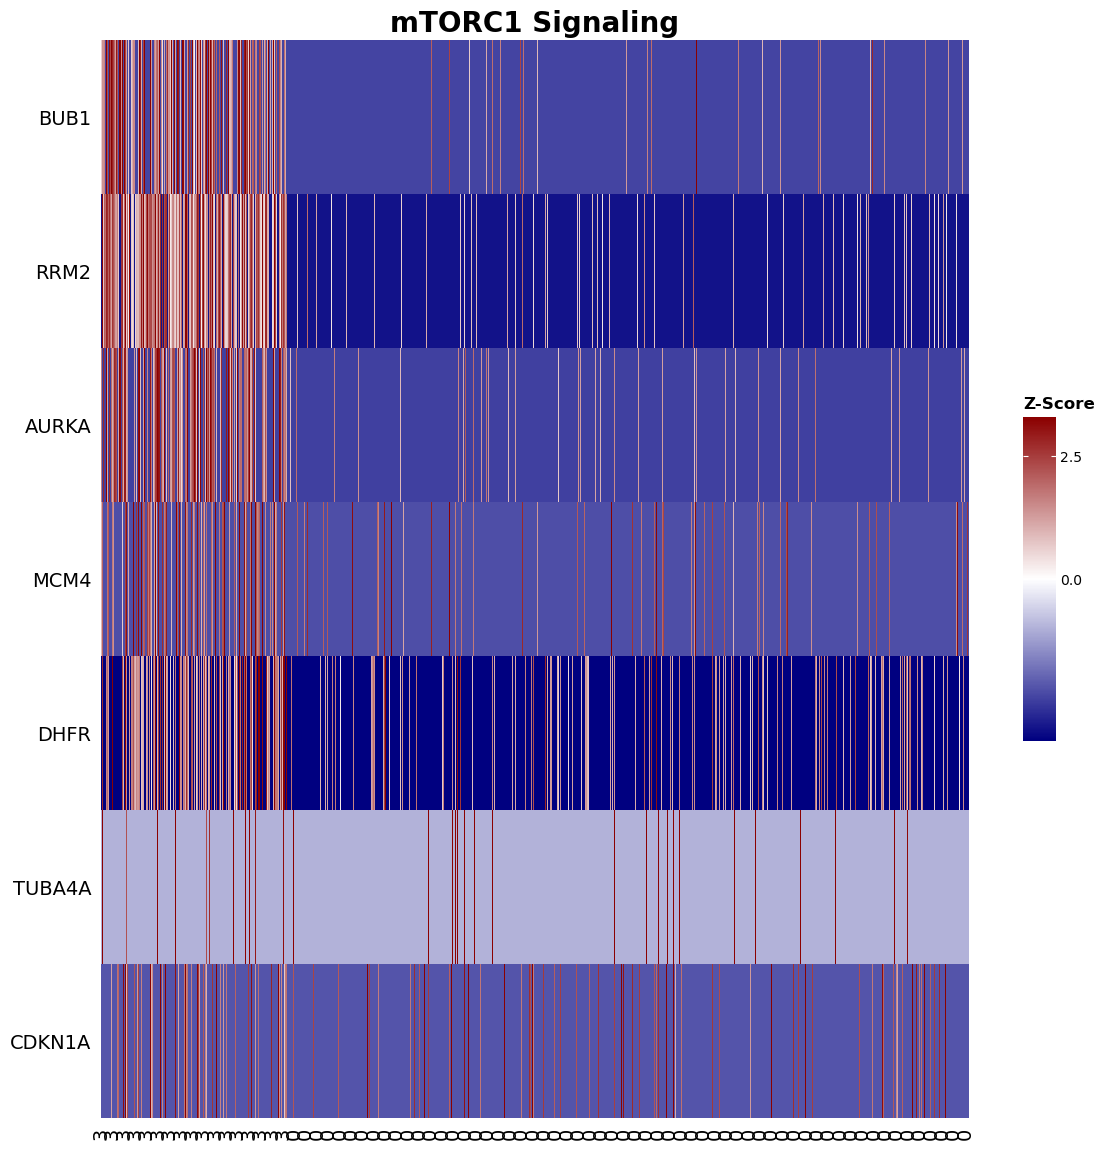

In [54]:
# Plot the heatmap
ax = heatmap(df=df_heat, z_score=0, title=terms[i], figsize=(14, 14))

#help(gp.gsea)

## Plot Bubbleplot

In [55]:
# Select the first 15 pathways by their original index order
top_15_res = res.res2d.iloc[:15]

# Display the top 15 pathways by original index
print("Top 15 pathways by original index:")
print(top_15_res)

Top 15 pathways by original index:
    Name                    Term        ES       NES NOM p-val FDR q-val  \
0   gsea         Mitotic Spindle  0.819417  2.746869       0.0       0.0   
1   gsea        mTORC1 Signaling  0.680436  2.269397       0.0       0.0   
2   gsea             E2F Targets  0.830968  2.140925       0.0  0.001523   
3   gsea         G2-M Checkpoint  0.831167  1.849026  0.043956  0.026846   
4   gsea         Spermatogenesis  0.760066  1.783628  0.005013  0.041126   
5   gsea              Myogenesis  0.539045  1.526312  0.046512  0.181639   
6   gsea              Glycolysis  0.619458    1.4586  0.151899  0.219664   
7   gsea       KRAS Signaling Dn  0.588151  1.133887  0.246377  0.691998   
8   gsea          UV Response Up -0.727676 -1.049558  0.666667       1.0   
9   gsea     Allograft Rejection -0.710246 -1.021278   0.58022       1.0   
10  gsea  Estrogen Response Late  0.661064  0.992833  0.532338       1.0   
11  gsea      TGF-beta Signaling -0.314041 -0.957193 

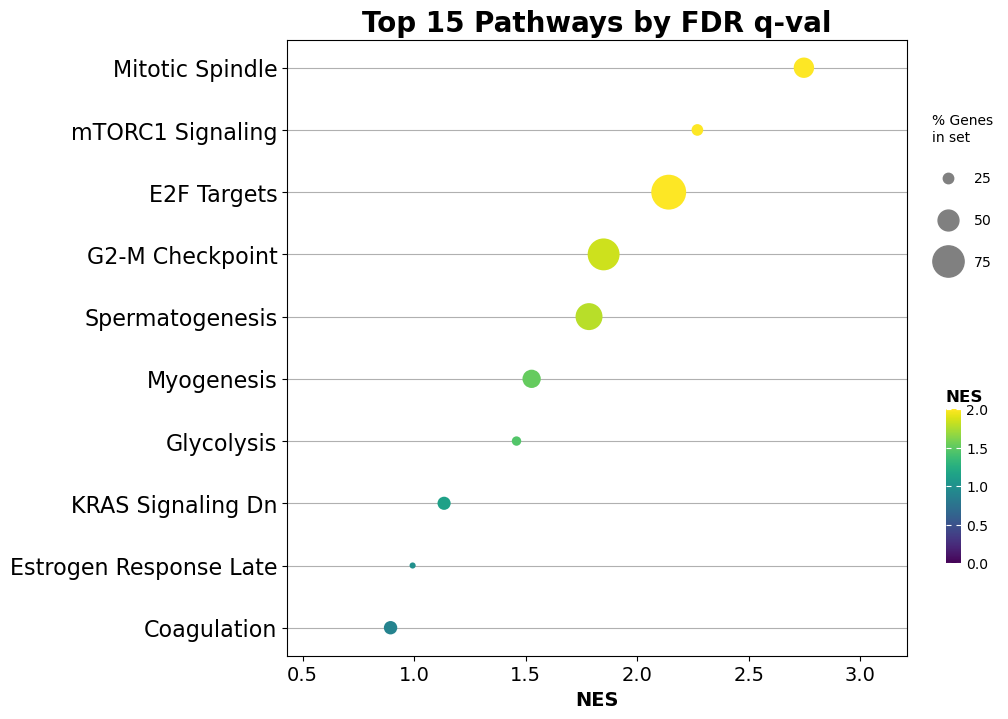

In [56]:
import matplotlib.pyplot as plt
from gseapy import dotplot

# Select the first 15 pathways by their original index order
top_15_res = res.res2d.iloc[:15]

# Find the minimum NES value to include all data
min_nes = top_15_res['NES'].min()

# Plotting bubble plot for the top 15 pathways
ax = dotplot(
    df=top_15_res,
    column='NES',         # Color bubbles by Normalized Enrichment Score
    title='Top 15 Pathways by FDR q-val',
    cmap=plt.cm.viridis,  # Colormap for coloring NES values
    size=5,               # Adjust the size of the bubbles
    figsize=(10, 8),      # Set figure size for better readability
    cutoff=-10,    # Ensure all NES values are included
    thresh=-5,
    n_terms=15
)

# Show the plot
plt.show()


In [57]:
import matplotlib.pyplot as plt
from gseapy import dotplot

# Select the first 15 pathways by their original index order
top_15_res = res.res2d.iloc[:15]
top_15_res

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Mitotic Spindle,0.819417,2.746869,0.0,0.0,0.0,23/47,9.30%,NEK2;KIF2C;CDK1;DLGAP5;TTK;KIF4A;BUB1;TOP2A;KI...
1,gsea,mTORC1 Signaling,0.680436,2.269397,0.0,0.0,0.0,7/25,17.33%,BUB1;RRM2;AURKA;MCM4;DHFR;TUBA4A;CDKN1A
2,gsea,E2F Targets,0.830968,2.140925,0.0,0.001523,0.002,36/43,13.66%,SPC25;KIF2C;CDK1;KIF18B;HMMR;DLGAP5;KIF4A;MKI6...
3,gsea,G2-M Checkpoint,0.831167,1.849026,0.043956,0.026846,0.047,36/47,13.66%,NEK2;KIF2C;CDK1;HMMR;POLQ;TTK;KIF4A;MKI67;BUB1...
4,gsea,Spermatogenesis,0.760066,1.783628,0.005013,0.041126,0.088,11/17,16.53%,NEK2;KIF2C;CDK1;TTK;BUB1;AURKA;CDKN3;CCNB2;DBF...
5,gsea,Myogenesis,0.539045,1.526312,0.046512,0.181639,0.36,18/41,27.75%,APOD;MYBPC3;COL4A2;MYOZ1;CRYAB;SGCA;COL6A3;COL...
6,gsea,Glycolysis,0.619458,1.4586,0.151899,0.219664,0.466,7/31,12.81%,CDK1;HMMR;DEPDC1;AURKA;CENPA;VCAN;SDC1
7,gsea,KRAS Signaling Dn,0.588151,1.133887,0.246377,0.691998,0.889,6/19,24.88%,ZBTB16;EGF;NOS1;DCC;CHST2;GRID2
8,gsea,UV Response Up,-0.727676,-1.049558,0.666667,1.0,1.0,1/17,0.37%,CCK
9,gsea,Allograft Rejection,-0.710246,-1.021278,0.58022,1.0,1.0,3/19,9.25%,IL13;TNF;CD86


/home/job37yv/miniforge3/envs/gsea/lib/python3.9/site-packages/gseapy/plot.py:738: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[self.colname] = df[self.colname].replace(0, np.nan).bfill()


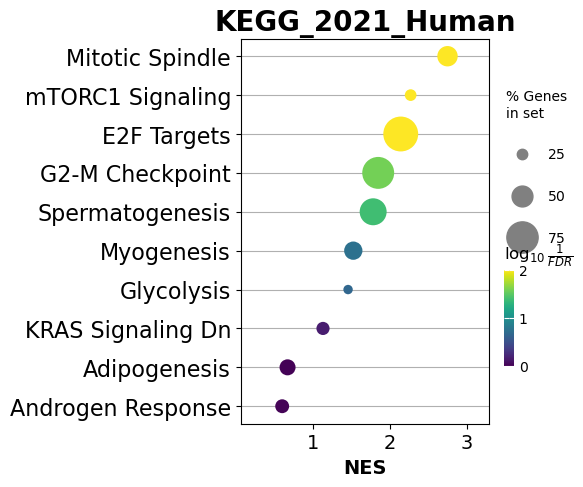

In [58]:
ax = dotplot(res.res2d,
column="FDR q-val",
title='KEGG_2021_Human',
cmap=plt.cm.viridis,
size=5,
figsize=(4,5), cutoff=2,     n_terms=15)

## Plot pathway network

In [59]:
import networkx as nx

In [60]:
res.res2d.head(20)


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Mitotic Spindle,0.819417,2.746869,0.0,0.0,0.0,23/47,9.30%,NEK2;KIF2C;CDK1;DLGAP5;TTK;KIF4A;BUB1;TOP2A;KI...
1,gsea,mTORC1 Signaling,0.680436,2.269397,0.0,0.0,0.0,7/25,17.33%,BUB1;RRM2;AURKA;MCM4;DHFR;TUBA4A;CDKN1A
2,gsea,E2F Targets,0.830968,2.140925,0.0,0.001523,0.002,36/43,13.66%,SPC25;KIF2C;CDK1;KIF18B;HMMR;DLGAP5;KIF4A;MKI6...
3,gsea,G2-M Checkpoint,0.831167,1.849026,0.043956,0.026846,0.047,36/47,13.66%,NEK2;KIF2C;CDK1;HMMR;POLQ;TTK;KIF4A;MKI67;BUB1...
4,gsea,Spermatogenesis,0.760066,1.783628,0.005013,0.041126,0.088,11/17,16.53%,NEK2;KIF2C;CDK1;TTK;BUB1;AURKA;CDKN3;CCNB2;DBF...
5,gsea,Myogenesis,0.539045,1.526312,0.046512,0.181639,0.36,18/41,27.75%,APOD;MYBPC3;COL4A2;MYOZ1;CRYAB;SGCA;COL6A3;COL...
6,gsea,Glycolysis,0.619458,1.4586,0.151899,0.219664,0.466,7/31,12.81%,CDK1;HMMR;DEPDC1;AURKA;CENPA;VCAN;SDC1
7,gsea,KRAS Signaling Dn,0.588151,1.133887,0.246377,0.691998,0.889,6/19,24.88%,ZBTB16;EGF;NOS1;DCC;CHST2;GRID2
8,gsea,UV Response Up,-0.727676,-1.049558,0.666667,1.0,1.0,1/17,0.37%,CCK
9,gsea,Allograft Rejection,-0.710246,-1.021278,0.58022,1.0,1.0,3/19,9.25%,IL13;TNF;CD86


In [61]:
help(gp.enrichment_map)

Help on function enrichment_map in module gseapy.plot:

enrichment_map(df: pandas.core.frame.DataFrame, column: str = 'Adjusted P-value', cutoff: float = 0.05, top_term: int = 10, **kwargs) -> Tuple[pandas.core.frame.DataFrame, pandas.core.frame.DataFrame]
    Visualize GSEApy Results.
    Node size corresponds to the percentage of gene overlap in a certain term of interest.
    Colour of the node corresponds to the significance of the enriched terms.
    Edge size corresponds to the number of genes that overlap between the two connected nodes.
    Gray edges correspond to both nodes when it is the only colour edge.
    When there are two different edge colours, red corresponds to positve nodes and blue corresponds to negative nodes.
    
    :param df: GSEApy DataFrame results.
    :param column: column name in `df` to map the node colors. Default: Adjusted P-value or FDR q-val.
                   choose from ("Adjusted P-value", "P-value", "FDR q-val", "NOM p-val").
    
    :param g

In [62]:
top_res = res.res2d.sort_values(by='NES', ascending=False).head(115)

# Generate the enrichment map using the top 20 pathways
nodes, edges = gp.enrichment_map(top_res, top_term=115)


/home/job37yv/miniforge3/envs/gsea/lib/python3.9/site-packages/gseapy/plot.py:738: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[self.colname] = df[self.colname].replace(0, np.nan).bfill()


In [83]:
nodes.head(40)


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,gsea,Spermatogenesis,0.760066,1.783628,0.005013,0.041126,0.088,11/17,16.53%,NEK2;KIF2C;CDK1;TTK;BUB1;AURKA;CDKN3;CCNB2;DBF...,1.385886,0.647059
1,gsea,G2-M Checkpoint,0.831167,1.849026,0.043956,0.026846,0.047,36/47,13.66%,NEK2;KIF2C;CDK1;HMMR;POLQ;TTK;KIF4A;MKI67;BUB1...,1.571121,0.765957
2,gsea,mTORC1 Signaling,0.680436,2.269397,0.0,0.001523,0.0,7/25,17.33%,BUB1;RRM2;AURKA;MCM4;DHFR;TUBA4A;CDKN1A,2.817250,0.280000
3,gsea,Mitotic Spindle,0.819417,2.746869,0.0,0.001523,0.0,23/47,9.30%,NEK2;KIF2C;CDK1;DLGAP5;TTK;KIF4A;BUB1;TOP2A;KI...,2.817250,0.489362
4,gsea,E2F Targets,0.830968,2.140925,0.0,0.001523,0.002,36/43,13.66%,SPC25;KIF2C;CDK1;KIF18B;HMMR;DLGAP5;KIF4A;MKI6...,2.817250,0.837209


In [82]:
!pwd

/storage/users/job37yv/Projects/single-cell_samantha/code/scripts_praktikum


In [81]:
edges.head(100)
edges.head(100).to_csv("edges_top100.csv", index=False)

In [65]:
import os

# Define the base path and file name
base_path = "/storage/users/job37yv/Projects/single-cell_samantha/data/res_gsea_hallmark/"
file_name = "enrichmap_reactome_leiden_3_vs_0_big.csv"
output_path = os.path.join(base_path, file_name)

# Select the top 100 edges
top_100_edges = edges

# Save the edges to a CSV file
top_100_edges.to_csv(output_path, index=False)

# Confirm save location
print(f"Edges saved to: {output_path}")

Edges saved to: /storage/users/job37yv/Projects/single-cell_samantha/data/res_gsea_hallmark/enrichmap_reactome_leiden_3_vs_0_big.csv


In [66]:
# build graph
G = nx.from_pandas_edgelist(edges,
    source='src_idx',
    target='targ_idx',
    edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])


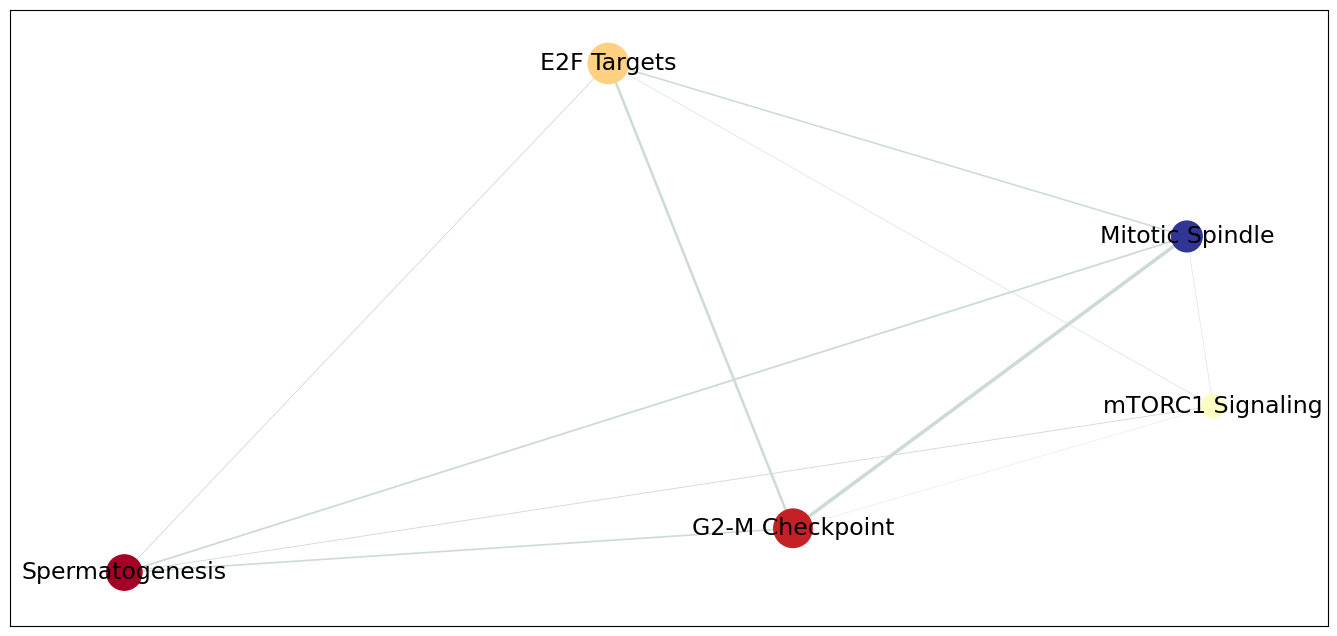

In [80]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax = plt.subplots(figsize=(17, 8))  # Increase the figure size

# Initialize node coordinates
pos = nx.layout.spiral_layout(G)

# Draw nodes
nx.draw_networkx_nodes(
    G,
    pos=pos,
    cmap=plt.cm.RdYlBu,
    node_color=list(nodes.NES),
    node_size=list(nodes.Hits_ratio * 1000)
)

# Draw node labels
nx.draw_networkx_labels(
    G,
    pos=pos,
    labels=nodes.Term.to_dict(),
    font_size=17  # Increase font size for better readability
)

# Draw edges
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(
    G,
    pos=pos,
    width=list(map(lambda x: x * 5, edge_weight)),
    edge_color='#CDDBD4'
)

plt.show()


Figure saved to: /storage/users/job37yv/Projects/single-cell_samantha/figures/res_gsea_hallmark/enrichmap_leiden_3_vs_0_big.png


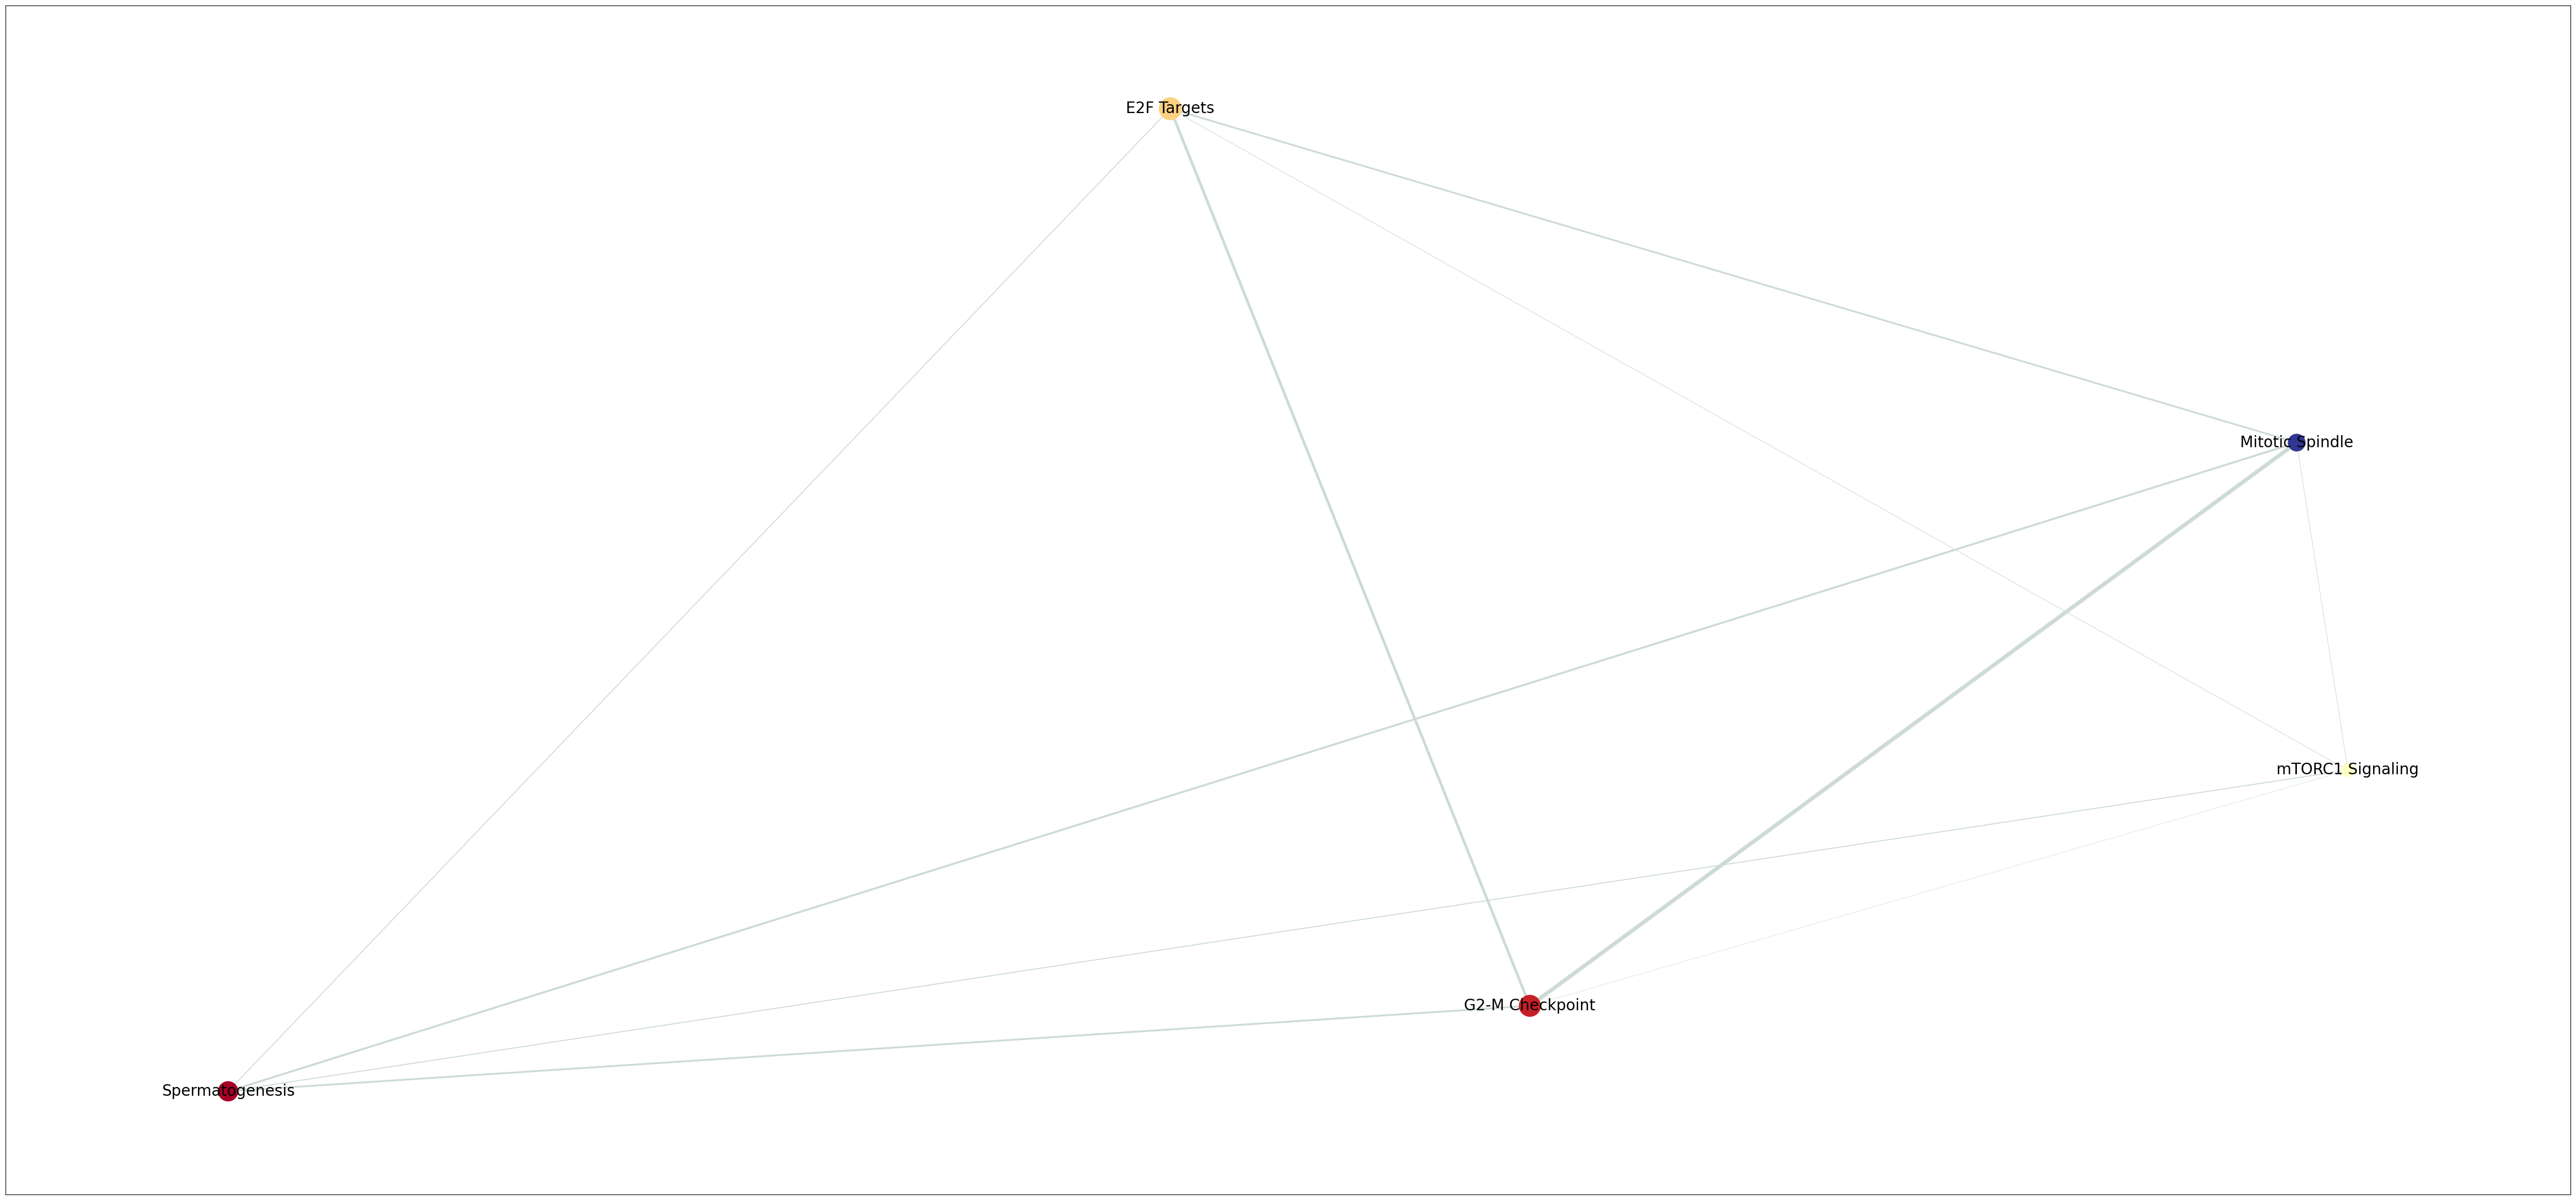

In [84]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the base path and file name
base_path = "/storage/users/job37yv/Projects/single-cell_samantha/figures/res_gsea_hallmark/"
file_name = "enrichmap_leiden_3_vs_0_big.png"
output_path = base_path + file_name

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(60, 28))  # Increase the figure size

# Initialize node coordinates
pos = nx.layout.spiral_layout(G)

# Draw nodes
nx.draw_networkx_nodes(
    G,
    pos=pos,
    cmap=plt.cm.RdYlBu,
    node_color=list(nodes.NES),
    node_size=list(nodes.Hits_ratio * 1000)
)

# Draw node labels
nx.draw_networkx_labels(
    G,
    pos=pos,
    labels=nodes.Term.to_dict(),
    font_size=20  # Increase font size for better readability
)

# Draw edges
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(
    G,
    pos=pos,
    width=list(map(lambda x: x * 10, edge_weight)),
    edge_color='#CDDBD4'
)

# Save the figure
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {output_path}")

# Show the plot (optional)
plt.show()


In [85]:
Regulation Of PLK1 Activity At G2/M Transitio
AURKA Activation By TPX2 R-HSA-885451
Transcriptional Regulation By TP53 R-HSA-3700989	
RHO GTPases Activate Formins R-HSA-5663220
Mitotic G2-G2/M Phases R-HSA-45327
G2/M Transition R-HSA-692
Apoptotic Execution Phase R-HSA-7515
Golgi-to-ER Retrograde Transport R-HSA-8856688
Intra-Golgi And Retrograde Golgi-to-ER Traff
Cellular Senesecence
Mitotic Spindle Ckeckpint

SyntaxError: invalid syntax (1266033794.py, line 1)

In [ ]:
# Define patterns to match pathways
patterns = [
    "Regulation Of PLK1 Activity At G2/M Transitio",
    "AURKA Activation By TPX2 R-HSA-885451",
    "Transcriptional Regulation By TP53 R-HSA-3700989",
    "RHO GTPases Activate Formins R-HSA-5663220",
    "Mitotic G2-G2/M Phases R-HSA-45327",
    "G2/M Transition R-HSA-692",
    "Apoptotic Execution Phase R-HSA-7515",
    "Golgi-to-ER Retrograde Transport R-HSA-8856688",
    "Intra-Golgi And Retrograde Golgi-to-ER Traff",
    "Mitotic Anaphase",
    "Cellular Senesecence",
    "Mitotic Spindle Ckeckpint",
    "EML4 and NUDC in Mitotic"
]

# Filter res.res2d for matching terms
filtered_res2d = res.res2d[res.res2d['Term'].str.contains('|'.join(patterns), na=False, case=False)]

# Display the filtered rows
print("Filtered pathways:")
print(filtered_res2d)



In [ ]:
# Generate the enrichment map
nodes, edges = gp.enrichment_map(filtered_res2d, top_term=17)
nodes.head(18)


In [ ]:
sorted_edges = edges.sort_values(by='jaccard_coef', ascending=False).head(50)
sorted_edges.head(50)
edges = sorted_edges.head(20)
edges.head(20)


In [ ]:
# Save edges to CSV
base_path_data = "/storage/users/job37yv/Projects/single-cell_samantha/data/res_gsea_hallmark/"
file_name_data = "enrichmap_reactome_leiden_2_vs_1_zoomed.csv"
output_path_data = os.path.join(base_path_data, file_name_data)

edges.to_csv(output_path_data, index=False)
print(f"Edges saved to: {output_path_data}")

In [ ]:
# Build graph
G = nx.from_pandas_edgelist(
    edges,
    source='src_idx',
    target='targ_idx',
    edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes']
)


In [86]:
# Plot the graph
base_path_fig = "/storage/users/job37yv/Projects/single-cell_samantha/figures/res_gsea_hallmark/"
file_name_fig = "enrichmap_leiden_2_vs_1_zoomed.png"
output_path_fig = os.path.join(base_path_fig, file_name_fig)

In [87]:
print(f"Number of nodes in G: {len(G.nodes)}")
print(f"Length of nodes.NES: {len(nodes.NES)}")
print(f"Length of nodes.Hits_ratio: {len(nodes.Hits_ratio)}")

Number of nodes in G: 5
Length of nodes.NES: 5
Length of nodes.Hits_ratio: 5


In [88]:
# Identify unique indices from edges
edge_indices = set(edges['src_idx']).union(set(edges['targ_idx']))

# Filter nodes to include only those present in edges
filtered_nodes = nodes[nodes.index.isin(edge_indices)]

# Verify consistency
print(f"Number of nodes after filtering: {len(filtered_nodes)}")
print(f"Number of edges: {len(edges)}")

# Verify consistency after filtering
print(f"Number of nodes in G: {len(G.nodes)}")
print(f"Length of filtered_nodes.NES: {len(filtered_nodes.NES)}")
print(f"Length of filtered_nodes.Hits_ratio: {len(filtered_nodes.Hits_ratio)}")

# Prepare node attributes
node_color = list(filtered_nodes['NES'])  # Match filtered nodes
node_size = list(filtered_nodes['Hits_ratio'] * 1000)  # Scale node sizes


Number of nodes after filtering: 5
Number of edges: 10
Number of nodes in G: 5
Length of filtered_nodes.NES: 5
Length of filtered_nodes.Hits_ratio: 5


In [89]:
import textwrap

Figure saved to: /storage/users/job37yv/Projects/single-cell_samantha/figures/res_gsea_hallmark/enrichmap_leiden_3_vs_0_big.png


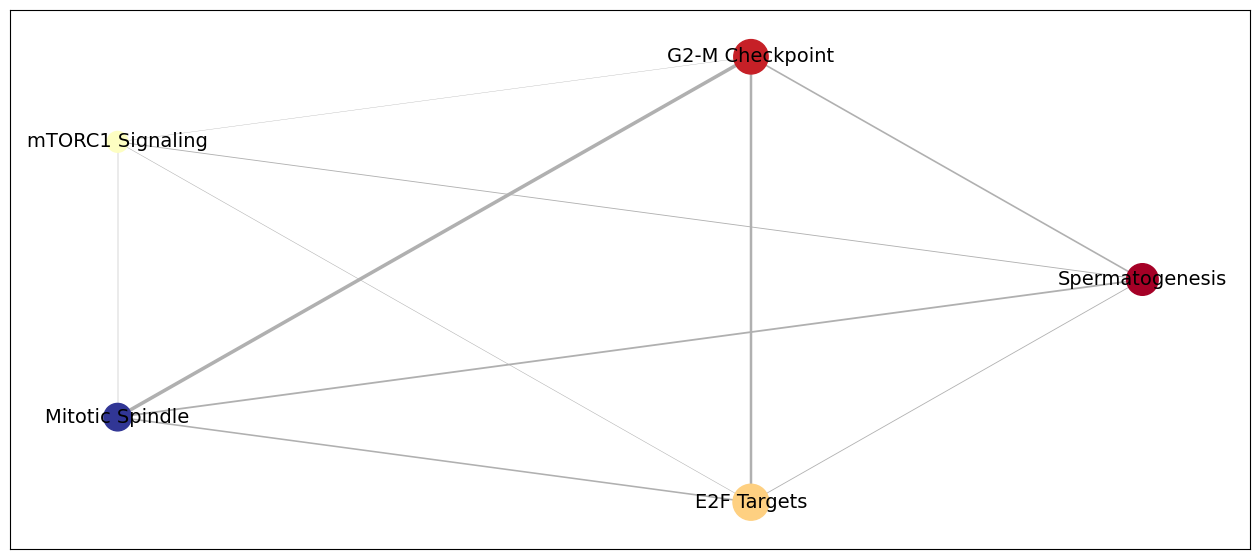

In [90]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(16, 7))  # Adjust figure size for compactness

# Initialize node coordinates using a circular layout for compact representation
pos = nx.layout.circular_layout(G)


import textwrap

# Define a function to wrap text
def wrap_text(label, width=20):
    return '\n'.join(textwrap.wrap(label, width))

# Shorten the labels by removing everything after and including "R-HSA-*"
shortened_labels = filtered_nodes['Term'].str.replace(r'R-HSA-.*$', '', regex=True)

# Wrap the shortened labels
wrapped_labels = shortened_labels.apply(wrap_text).to_dict()


# Initialize node coordinates using a circular layout for compact representation
pos = nx.layout.circular_layout(G)

# Draw nodes with adjusted size
nx.draw_networkx_nodes(
    G,
    pos=pos,
    cmap=plt.cm.RdYlBu,
    node_color=list(filtered_nodes.NES),
    node_size=list(filtered_nodes.Hits_ratio * 800)  # Reduce size for compactness
)

# Draw node labels with wrapped terms
nx.draw_networkx_labels(
    G,
    pos=pos,
    labels=wrapped_labels,
    font_size=14,  # Adjust font size as needed
    verticalalignment="center"  # Center the labels better
)

# Draw edges with reduced width
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(
    G,
    pos=pos,
    width=list(map(lambda x: x * 5, edge_weight)),  # Reduce edge thickness
    edge_color='#B0B0B0'  # Lighter edge color for better contrast
)

# Save the figure
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {output_path}")

# Show the plot
plt.show()


### Network Plot

In [215]:
import reactome2py.analysis as analysis
print(dir(analysis))

['ConnectionError', 'NumberTypes', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'compare_species', 'csv', 'db_name', 'db_version', 'found_entities', 'identifier', 'identifiers', 'identifiers_form', 'identifiers_mapping', 'identifiers_mapping_form', 'identifiers_mapping_url', 'identifiers_url', 'import_form', 'import_json', 'import_url', 'pandas', 'pathway2df', 'print_function', 'report', 'requests', 'result2json', 'token', 'token_filter_species', 'token_pathway_page', 'token_pathway_reactions', 'token_pathway_summary', 'token_pathways_binned', 'token_pathways_reactions', 'token_pathways_result', 'token_pathways_summary', 'token_resources', 'token_unfound_identifiers', 'unfound_entities', 'unicode_literals']


In [217]:
from reactome2py.analysis import token, token_pathways_summary
import matplotlib.pyplot as plt

# Example gene list for pathway analysis
gene_list = "TP53,BRCA1,EGFR,MTOR,MAPK1"
species = "Homo sapiens"

# Submit gene list for Reactome analysis
response = token.post_ids(ids=gene_list, species=species)

# Extract the analysis token
analysis_token = response['summary']['token']
print(f"Analysis Token: {analysis_token}")

# Retrieve pathway summaries
pathways_summary = token_pathways_summary(analysis_token)
print("Pathway Summary:")
for pathway in pathways_summary['pathways'][:5]:  # Show top 5 pathways
    print(f"Pathway: {pathway['name']}, Identifier: {pathway['dbId']}")


AttributeError: 'function' object has no attribute 'post_ids'

In [216]:
from reactome2py.content import pathway
import matplotlib.pyplot as plt

# Extract Reactome pathway IDs from the GSEA results
pathway_ids = res.res2d.Term.tolist()  # Assuming Reactome pathway names/IDs are in the Term column

# Select the top pathway
top_pathway_id = pathway_ids[0]  # Replace with the desired pathway ID from your results

# Fetch the pathway diagram as a PNG
diagram_info = pathway.get_pathway_diagram_png(top_pathway_id)

# Save the pathway diagram as an image
file_name = f"reactome_{top_pathway_id}.png"
with open(file_name, "wb") as f:
    f.write(diagram_info)

# Load and display the pathway diagram
img = plt.imread(file_name)
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plt.imshow(img)
plt.axis('off')
plt.title(f"Reactome Pathway Diagram: {top_pathway_id}")
plt.show()



ImportError: cannot import name 'pathway' from 'reactome2py.content' (/home/job37yv/miniforge3/envs/gsea/lib/python3.9/site-packages/reactome2py/content.py)

In [211]:

# Load and display the pathway diagram
img = plt.imread(f"reactome_{top_pathway_id}.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.title(f"Reactome Pathway Diagram: {top_pathway_id}")
plt.show()



ImportError: cannot import name 'identify' from 'reactome2py.analysis' (/home/job37yv/miniforge3/envs/gsea/lib/python3.9/site-packages/reactome2py/analysis.py)

In [210]:
for pathway_id in pathway_ids:
    # Fetch and save pathway diagram
    diagram_info = visualization.get_pathway_diagram_png(pathway_id)
    with open(f"reactome_{pathway_id}.png", "wb") as f:
        f.write(diagram_info.content)

    # Load and display
    img = plt.imread(f"reactome_{pathway_id}.png")
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Reactome Pathway Diagram: {pathway_id}")
    plt.show()


NameError: name 'pathway_ids' is not defined

In [218]:
from reactome2py import analysis

# Input biomarkers
markers = 'RAS,MAP,IL10,EGF,EGFR,STAT'

# Perform enrichment analysis
result = analysis.identifiers(ids=markers)
token = result['summary']['token']
print(f"Analysis Token: {token}")


Analysis Token: MjAyNDEyMTcxNjQ3MTJfNzIxMg%3D%3D


In [219]:
import webbrowser

# Reactome web portal URL with the analysis token
url = f"https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS={token}"
webbrowser.open(url)


>4;1H8TPS connection to reactome.org                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

True

In [220]:
import os
from reactome2py import analysis

# Create a directory to save the report
if not os.path.exists('full-report/'):
    os.makedirs('full-report/')

# Save the report
analysis.report(
    token=token,
    path='full-report/',
    file='report.pdf',
    number='25',  # Number of pathways to include
    resource='TOTAL',
    diagram_profile='Modern',
    analysis_profile='Standard',
    fireworks_profile='Barium Lithium',
    species='Homo sapiens',
    chunk_size=128
)
print("Full report saved to 'full-report/report.pdf'")


Full report saved to 'full-report/report.pdf'


In [221]:
# Fetch significant pathways
token_result = analysis.token(
    token=token,
    species='Homo sapiens',
    page_size='-1',
    page='-1',
    sort_by='ENTITIES_FDR',
    order='ASC',
    resource='TOTAL',
    p_value='0.05',
    include_disease=True
)

# Extract pathway names and IDs
pathways = token_result['pathways']
pathways_stId = [p['stId'] for p in pathways]
print("Significant Pathways:")
for pathway in pathways:
    print(f"Pathway: {pathway['name']}, Reactome ID: {pathway['stId']}")


Significant Pathways:
Pathway: PLCG1 events in ERBB2 signaling, Reactome ID: R-HSA-1251932
Pathway: Inhibition of Signaling by Overexpressed EGFR, Reactome ID: R-HSA-5638303
Pathway: Signaling by Overexpressed Wild-Type EGFR in Cancer, Reactome ID: R-HSA-5638302
Pathway: EGFR interacts with phospholipase C-gamma, Reactome ID: R-HSA-212718
Pathway: ERBB2 Activates PTK6 Signaling, Reactome ID: R-HSA-8847993
Pathway: SHC1 events in EGFR signaling, Reactome ID: R-HSA-180336
Pathway: ERBB2 Regulates Cell Motility, Reactome ID: R-HSA-6785631
Pathway: Constitutive Signaling by EGFRvIII, Reactome ID: R-HSA-5637810
Pathway: Signaling by EGFRvIII in Cancer, Reactome ID: R-HSA-5637812
Pathway: Signaling by ERBB2 ECD mutants, Reactome ID: R-HSA-9665348
Pathway: GAB1 signalosome, Reactome ID: R-HSA-180292
Pathway: GRB2 events in EGFR signaling, Reactome ID: R-HSA-179812
Pathway: GRB2 events in ERBB2 signaling, Reactome ID: R-HSA-1963640
Pathway: PI3K events in ERBB2 signaling, Reactome ID: R-HSA-19

In [222]:
from reactome2py import content

# Create directory for saving the fireworks diagram
if not os.path.exists('fireworks/'):
    os.makedirs('fireworks/')

# Save the fireworks diagram
content.export_fireworks(
    species='9606',  # Human species ID
    ext='png',
    file='fireworks_report',
    path='fireworks/',
    quality='10',
    resource='TOTAL',
    title=True,
    margin='15',
    token=token
)
print("Fireworks diagram saved to 'fireworks/fireworks_report.png'")


Fireworks diagram saved to 'fireworks/fireworks_report.png'


In [223]:
import itertools

# Fetch pathways with diagrams
fetch_downstream_pathways = [
    content.pathways_low_diagram(id=stId, species=None, all_forms=False) for stId in pathways_stId
]

downstream_pathways = [low_pathway for low_pathway in fetch_downstream_pathways if low_pathway is not None]
has_diagram = [p[0]['hasDiagram'] for p in downstream_pathways]
downstream_pathway_has_diagram = list(itertools.compress(downstream_pathways, has_diagram))
downstream_pathway_stId = [p[0]['stId'] for p in downstream_pathway_has_diagram]

# Create directory for saving diagrams
if not os.path.exists('diagrams/'):
    os.makedirs('diagrams/')

# Save each pathway diagram
for stId in downstream_pathway_stId:
    content.export_diagram(
        id=stId,
        ext='png',
        quality='5',
        flag_interactors=False,
        title=True,
        margin='15',
        ehld=True,
        diagram_profile='Modern',
        resource='TOTAL',
        analysis_profile='Standard',
        token=token,
        file=f"{stId}_report",
        path='diagrams/'
    )
print("Pathway diagrams saved to 'diagrams/'")


Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value of 404
Status code returned a value